In [1]:
from __future__ import division, print_function, absolute_import

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
fashion_mnist = data = input_data.read_data_sets('data/fashion', source_url='http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/')


Extracting data/fashion/train-images-idx3-ubyte.gz
Extracting data/fashion/train-labels-idx1-ubyte.gz
Extracting data/fashion/t10k-images-idx3-ubyte.gz
Extracting data/fashion/t10k-labels-idx1-ubyte.gz


In [3]:
mnist=fashion_mnist

In [4]:
print("Training set (images) shape: {shape}".format(shape=fashion_mnist.train.images.shape))
print("Training set (labels) shape: {shape}".format(shape=fashion_mnist.train.labels.shape))
print("Training set (images) shape: {shape}".format(shape=fashion_mnist.test.images.shape))
print("Training set (labels) shape: {shape}".format(shape=fashion_mnist.test.labels.shape))

Training set (images) shape: (55000, 784)
Training set (labels) shape: (55000,)
Training set (images) shape: (10000, 784)
Training set (labels) shape: (10000,)


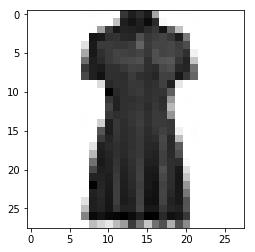

In [5]:
sample_1 = fashion_mnist.train.images[47].reshape(28,28)

plt.imshow(sample_1, cmap='Greys')

In [6]:
# Training Parameters
learning_rate = 0.01
num_steps = 30000
batch_size = 256

display_step = 1000
examples_to_show = 10

# Network Parameters
num_hidden_1 = 256 # 1st layer num features
num_hidden_2 = 150 # 2nd layer num features (the latent dim)
num_input = 784 # MNIST data input (img shape: 28*28)

# tf Graph input (only pictures)
X = tf.placeholder("float", [None, num_input])

weights = {
    'encoder_h1': tf.Variable(tf.random_normal([num_input, num_hidden_1])),
    'encoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_hidden_2])),
    'decoder_h1': tf.Variable(tf.random_normal([num_hidden_2, num_hidden_1])),
    'decoder_h2': tf.Variable(tf.random_normal([num_hidden_1, num_input])),
} 
biases = {
    'encoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'encoder_b2': tf.Variable(tf.random_normal([num_hidden_2])),
    'decoder_b1': tf.Variable(tf.random_normal([num_hidden_1])),
    'decoder_b2': tf.Variable(tf.random_normal([num_input])),
}

In [7]:
# Building the encoder
def encoder(x):
    # Encoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['encoder_h1']),
                                   biases['encoder_b1']))
    # Encoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['encoder_h2']),
                                   biases['encoder_b2']))
    return layer_2


# Building the decoder
def decoder(x):
    # Decoder Hidden layer with sigmoid activation #1
    layer_1 = tf.nn.sigmoid(tf.add(tf.matmul(x, weights['decoder_h1']),
                                   biases['decoder_b1']))
    # Decoder Hidden layer with sigmoid activation #2
    layer_2 = tf.nn.sigmoid(tf.add(tf.matmul(layer_1, weights['decoder_h2']),
                                   biases['decoder_b2']))
    return layer_2

# Construct model
encoder_op = encoder(X)
decoder_op = decoder(encoder_op)

# Prediction
y_pred = decoder_op
# Targets (Labels) are the input data.
y_true = X

# Define loss and optimizer, minimize the squared error
loss = tf.reduce_mean(tf.pow(y_true - y_pred, 2))
optimizer = tf.train.RMSPropOptimizer(learning_rate).minimize(loss)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()

In [8]:
# Start Training
# Start a new TF session
sess = tf.Session()

# Run the initializer
sess.run(init)

# Training
for i in range(1, num_steps+1):
    # Prepare Data
    # Get the next batch of MNIST data (only images are needed, not labels)
    batch_x, _ = mnist.train.next_batch(batch_size)

    # Run optimization op (backprop) and cost op (to get loss value)
    _, l = sess.run([optimizer, loss], feed_dict={X: batch_x})
    # Display logs per step
    if i % display_step == 0 or i == 1:
        print('Step %i: Minibatch Loss: %f' % (i, l))

Step 1: Minibatch Loss: 0.389184
Step 1000: Minibatch Loss: 0.133244
Step 2000: Minibatch Loss: 0.127410
Step 3000: Minibatch Loss: 0.107806
Step 4000: Minibatch Loss: 0.103966
Step 5000: Minibatch Loss: 0.098891
Step 6000: Minibatch Loss: 0.097627
Step 7000: Minibatch Loss: 0.092967
Step 8000: Minibatch Loss: 0.085544
Step 9000: Minibatch Loss: 0.085908
Step 10000: Minibatch Loss: 0.086350
Step 11000: Minibatch Loss: 0.085823
Step 12000: Minibatch Loss: 0.088092
Step 13000: Minibatch Loss: 0.085579
Step 14000: Minibatch Loss: 0.078612
Step 15000: Minibatch Loss: 0.077445
Step 16000: Minibatch Loss: 0.078616
Step 17000: Minibatch Loss: 0.077930
Step 18000: Minibatch Loss: 0.078994
Step 19000: Minibatch Loss: 0.074472
Step 20000: Minibatch Loss: 0.074929
Step 21000: Minibatch Loss: 0.073535
Step 22000: Minibatch Loss: 0.074276
Step 23000: Minibatch Loss: 0.071014
Step 24000: Minibatch Loss: 0.071683
Step 25000: Minibatch Loss: 0.070626
Step 26000: Minibatch Loss: 0.071916
Step 27000: Mi

(4, 784)
(4, 784)
(4, 784)
(4, 784)
Original Images


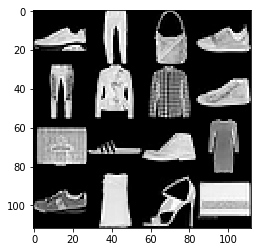

Reconstructed Images


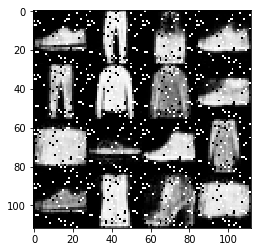

In [9]:
# Testing
# Encode and decode images from test set and visualize their reconstruction.
n = 4
canvas_orig = np.empty((28 * n, 28 * n))
canvas_recon = np.empty((28 * n, 28 * n))
for i in range(n):
    # MNIST test set
    batch_x, _ = mnist.test.next_batch(n)
    print(batch_x.shape)
    # Encode and decode the digit image
    g = sess.run(decoder_op, feed_dict={X: batch_x})
    
    # Display original images
    for j in range(n):
        # Draw the generated digits
        canvas_orig[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = batch_x[j].reshape([28, 28])
    # Display reconstructed images
    for j in range(n):
        # Draw the generated digits
        canvas_recon[i * 28:(i + 1) * 28, j * 28:(j + 1) * 28] = g[j].reshape([28, 28])

print("Original Images")     
plt.figure(figsize=(n, n))
plt.imshow(canvas_orig, origin="upper", cmap="gray")
plt.show()

print("Reconstructed Images")
plt.figure(figsize=(n, n))
plt.imshow(canvas_recon, origin="upper", cmap="gray")
plt.show()

In [11]:
batch_train, y_train = mnist.train.next_batch(55000)
batch_test, y_test = mnist.test.next_batch(10000)


# Encode and decode the digit image
encoded_train = sess.run(encoder_op, feed_dict={X: batch_train})
encoded_test = sess.run(encoder_op, feed_dict={X: batch_test})


In [53]:
from sklearn.metrics.pairwise import cosine_similarity
old_distance = cosine_similarity(batch_test)
new_distance = cosine_similarity(encoded_test)

In [54]:
for i in range(batch_test.shape[0]):
    old = np.argsort(-old_distance[i])
    new = np.argsort(-new_distance[i])
    print("old:",old[:20])
    print("new:",new[:20])

old: [   0 7774 8427 8643 5737 8702 1847 1155 9784 5926 5451 7708 6210 1730
 7833 5470 7980 5622 1897  545]
new: [   0 1730 8427 5926 1155 1918 9398 7980 8625 5023 1932 1897 8656 7774
 4299 3642  881 6795 5958 5737]
old: [   1 1874 6487 7610 8605 9986 2209 9379 7137 2638 7265 7486 1743 4307
 7515 6561  243 9155 6259 6868]
new: [   1 8605 5200 6259 7989 9605 4155  319 7610 4184 4318 4062 2638 8694
 7827 6388 7486  243 3827 4162]
old: [   2  855 9694  359 6165 8188 8429 6550 9042  294  394 1078 1050 2891
 1983  875 1815 5997 5106 9827]
new: [   2 8188 5063 9694 8238 5997 9882 2891 9827 8665 8429 2373 8999  294
 9042 6270  444 3613 5223 7222]
old: [   3 2027 8766 9962 2524 6032 2607  686 5079 2681 9404 4705 6965 1154
 4331 3478 9812 6876 5679 3245]
new: [   3 2027 2524 6900 2681 5336 1154 8611 1998  118 8080 2607 5768 8766
 8052 9404 8481 9812 1501 5679]
old: [   4 9735 3429 6295 8617 7783 1577 6552 6697 9169 2476 6988 9602  756
 5238  200 6802 8822 7089 5385]
new: [   4 2476 3429 9735 84

old: [ 111 7914  382 6878 7862 3141 7818 7539 2359 7942 9584 3616 3754 2815
 8992 6718  372 5571 9191 8631]
new: [ 111 7870 3695 4866 1400  244 7180  695  204  594 7426 5091 9186  963
   70 6382 3206 3493 9245 8290]
old: [ 112 8329 3927  120  269  907 3845  483 9738 9343 7327 4711 9533 8116
 9241 7362 7718 6013 7929 7240]
new: [ 112 7327 3927  483 5454 5514 5835 9738 8275 7718 8329 7992 7240 7885
 2137 9624 4334 9343   15 6013]
old: [ 113 1166 3284 8237   81 2050 4057 8313 9887 6508 8609  796 9142 2126
 5777 5291 6477 5973 2993 1383]
new: [ 113 5949 1166 3284 1736 2172 7865 6508 5973 3900 8676 9887 5810 1383
 3615 8313 7669 4664 2092 4057]
old: [ 114 4255 1767 2543 8143 1275 5138 7240 6439 2688 4020 3561 4572 8242
 6491 6829 8280  830 5095 5942]
new: [ 114 9226 4978 2869 5157 3130 3561 5072 1842 5942 5514 8242  602 8273
 8364 5515 7724 8275  124 4290]
old: [ 115 9304 7681 3052 4335 2572 4819 4304 2832 4633 3940 9412 8291 1692
 5711 6268 3688 7936 9279 5622]
new: [ 115 9304 7681 9279 16

old: [ 219 5096 8568 6684 3422 4366 1579 1113  259 3086 1258 9661 3939  956
 1045 1726  645 6689 9843 3696]
new: [ 219 2796 1113 3966 5428  645 1579 6684 5096 3422 2728  259 7905 1840
 5231 3682 4366 1940 6350  712]
old: [ 220 9097 4602 1843 8776 1753 7356 2861 1684 8995 5189 1563 2630 1268
 9925 9491 7711 4271 4137 2766]
new: [ 220 9097 8776 4602 4796 1684 2861 1268 7923  687 8995 6758 7356 1843
 5990 6102 3416 2634 9491 6451]
old: [ 221 7353 1780  703  212 9271 5246 8245 6802 7428 1799   34  551 1129
 7938 1877 3212 6976 8791 9921]
new: [ 221  212 7808 7348 9801 4337 9526 6815 5609 9355 1035  377 7518 8008
 2767 3134 8801 6871 7966 1298]
old: [ 222 8045 8041 7212 4038 5670 6908 4929 3537 7054 3808 8393 5606 7149
 3874 7530 4292 3989 5651 8582]
new: [ 222 8045 8041 1272 4929 7212 3808 4038 5998 4481 1593 3989 7054 5019
 4156 3465 7149 6219 5651 9139]
old: [ 223  895 6192 7922  174  324 7158 8667 4226 6512 2528  861 1938 6855
 6065  790 1750 2938 5633 8982]
new: [ 223 2538  174 6192 91

old: [ 328 6962 7859 9078 7473 1935 6678 9578 4849 7682 2154 4330 2574 5431
 3390 7062 1763  882 5314  443]
new: [ 328 6962 7859 4680 1935 9078 9579 2644  676 2729 9124 4849 2154 4922
 7062 4330 1171 1564 9578 8363]
old: [ 329  790 7667 2280 7922  587  591 4649 5633  324 6065 4612 6310 6192
 4364 5947  861 1485 5029 1146]
new: [ 329 8848  861  191 4364 1146 5633 9181  790 5771 8823 2933  587 6528
 1485 9173 6310 6494 5837 6619]
old: [ 330 1287 4339 1308 8897 5732 6538 4686 4357 8061 9514   60 6255 4125
 9840 3312 7046 8482  181 4930]
new: [ 330 2994 5545 2887 1826 6302  300 1548  870 5349 2897 3531 4966 6642
 8048 2324 1221 6224 3547 4549]
old: [ 331 2094 3135 7751 5085 1823 5203 4258 2226 8602 4301 4627 3595  982
   75 9363 6926 1116 2448  383]
new: [ 331 5085 3135 4301 1116 5203 6926 4258 5482 7074 7751 1823 2161 3868
 3595 7334 3376   75 8602 6865]
old: [ 332 7935 1359 5941 5905 2013 5747 7209 2852 1007 6593 9388 9979 1483
 7815 5259 2099 1740 1900 6890]
new: [ 332 5259 5941 1359 72

old: [ 442 7606 5451 7980 5550 5861 1932 8643 1111 8656 5023 8688 5648 8625
  510 1419 5958  617 2658  545]
new: [ 442 7606 1790 5023 5451 7980 4620 8688  617 2695 1932  850 1256 1155
 1740 1847 8643 8625 2548 1257]
old: [ 443 9678 9578 2963 9579 8084 7062 2757 2574  328 9078 4488 6962 7859
 2154 1763 8579 3963 2441 9221]
new: [ 443 1171 4330  807 8084 1763 9078 5413 3649 4849 8140 2574 8696 4488
 7316 9221 7167 4327 4906 7062]
old: [ 444 7083 9042  926  877 2373 6510 4671 8359 1773 5063 9827 9499 7113
 1777 9390 2309 8240 2520 5775]
new: [ 444 8665  741 9756  926 8359 9882 9694 5316 3497 7083 2891 9827 2686
 9265 4361 2373    2 9042 5223]
old: [ 445 2362 4872 3570 4346 2632 3351 2350 4177 1863 4841 6153 4546 2613
 3703 3915 4935 4563 2075 1363]
new: [ 445  410 4598  749 5290 4872 2632 6153 6051 3570 3915 9968 2613 2362
 1515 4546 8765 5239 4935 7277]
old: [ 446 2119  562 1257 6268 8688 2751 4620 4958 5023  617 4704 1419 3688
 9940 8656 5496 7606 1692 3940]
new: [ 446 1257 9552 2119 39

old: [ 554 2472  838 3384 7561 4371  938 4300 7442 3228 1243 9164 3527 7665
  827 8230  378 5812 4428 5293]
new: [ 554 4371 7442 8998 7561 5807 3527 6625 3978  838 7765 6582  169 6538
 1747 9795 5293 3070 5812 9213]
old: [ 555 7667 2015 4612 1573 3315 2916 2473 5224 3069 3387 1585 7922   38
  606 5983 5633 8920 5263 2733]
new: [ 555 6258 5224 7557 7396 3315 3387 7333 1585 8920 3069 9679 1110 1573
 9381 4445 6577 3266 6203 9298]
old: [ 556 5479 3946 8897 1824  450 2581 9741 9759 4146   88  233 9831 1287
 4357 1657 5472 3770 4220 8185]
new: [ 556 6038 3487 1308 2581 5489 6729 8897  280 9741 1711 1824 7373 5403
 4183 5479 1572 4679 8185  233]
old: [ 557  854 3354 3319 6552 4982 6353  683 2997 2263 8394 7668 2387 4537
 6485 9667 4861 3046 7783 6778]
new: [ 557  854 3319 6488 6552 3354 5781  683 4982 5546 9924 9413 7783 2387
 1235 6353 7668 3383 6778 4537]
old: [ 558 8240 7106 7159 5396 5575 2520 9851  877 1777  741  970 2946  926
 3990 9694 7083 2434 2891 9265]
new: [ 558 7106 8359 7083  2

old: [ 666 3945 2243 8705 3296 5924   69 1224 5356  773 1069 5530 7236 5441
 8225 1553 1987  633 1941 1545]
new: [ 666 1069 1031 4216 2243 7880 8206 7947 5522 5780 6304  323 5831 5015
 9830 9206 8166 3296 9682 3935]
old: [ 667 7174 7446 4418 5466 5558  688 3668 7506 3280 5007 8103 3646 1150
 5229 5140 7662   73  687 3370]
new: [ 667 3668 7256 8103 4806 5455 5007 6326 3520 6392 3280 1416  688   73
 5466 4364 6423 7851 8303 5872]
old: [ 668 2520 4893 2309 5074  558 8240 8431 9769  877 7106 8188 7773 1777
  350 1885 8234 4671 6346 8346]
new: [ 668 4425 1117 6973 2520 2129  345 5074 1033 5775 4757 4671 9769 4081
   16 1808 7085 8298 8583 2309]
old: [ 669 7237 7111 6516 8412 6001 5064 5346 7326 4830 9824 1638 6358  672
 9896  232 4860 3826 4393 6145]
new: [ 669 3965 2319 2336 7021 7375 6321 4820 6628 7614 7389 2921 6318 5735
 5755 6653 8457 1091 6803 3291]
old: [ 670 1504 5229 4509 6696 9173  687 1753 5639 4364 8823 7450 5159 4670
 4602 8776 5816 8213 7506 1416]
new: [ 670 6619 6310 6696  5

old: [ 780 2044 3421 1907 9048 6581  576 8179 6797 3333 8286  150 6569 9110
 5725 2284 7927 9251 3301 5681]
new: [ 780 2044  576 5725 2245 6581 6264 3421 5217 2624 7927 9110 4590 1449
 6569 6988 2096 5952  150 3146]
old: [ 781  684 3461 7800 4212 9693 6256 2500 5808 4307 7515 7957 2000 4662
 1356 7265 5585 1743 2850 2402]
new: [ 781 9693 3657  684 4730 7800 8235 7515 1356 2000 6256 8761 1721 9444
 2205 3461 6738 5585 3021 7265]
old: [ 782 9785  481 6089 6687 4861 6985 1034 9159 3383 4502 6778 5858 5781
 6341 3386 4294  864 6782 5082]
new: [ 782 1034 4294 1799 5093 6985 9921  481 4861 6782 8887 4502 8308 4272
 5858 1738 6353 9870 8663  650]
old: [ 783 3889 3138 1860 7559 6191 2551 6042 6060 5435 3303 4981 9275 7359
 6680 6212 4566 1809 7309 9332]
new: [ 783 5435 3303 3597 4981 7559 3889 6942 2212 7712 4453 9212 6191 2551
 1860 4632 2671 3214 9332 8904]
old: [ 784 6128 5826 9461 9564 2159 7016 8098 6426 1958 1975 9748 4401 8827
 4808  688 2422  577 9167 5455]
new: [ 784 9461  577 4808 64

old: [ 891 8244 9039 9698 8795 5112 7149 4558 2026 2409 6289 8465 7891 6120
 6996 4928 2341 8375 6300 8535]
new: [ 891 8244 3496 3599 9039 5374 8465 1569 2409 8795 9698 5324 8375 9269
 4928 2341 6120 8644 7891 7928]
old: [ 892 9733 8110 4303 5088 9225 8850 1199 4723 6633 1533 1103 2304 7507
 2117 1500 6603 3920 6338 2782]
new: [ 892 9225 9733 8110 2117 2304  744 8439 2502 3085 3803 8679 4303 1199
 7507 9402 6603 2484 4723 5528]
old: [ 893 1321 3192 3279 7227 8053 4174 2804 7372 4082 7563 7196 5666 8163
 9790 6646 2191 7057 2146   55]
new: [ 893 7227 8053 4174 4082 2146 1321 3431 9790 7372 3192 7057 1607 7563
 2776 6646 7196 7360 8255 2191]
old: [ 894 3212   34 8308  703 1780 4407  697 8852 1129 1788 8922 2997 3070
  800 7485 5896 1733 4915 8862]
new: [ 894 1780 1129 2244 1788 8922 2334 3212 8308 5246  592  938 2997 7089
 5462 3426 6985 7886 9048   49]
old: [ 895  223 2528 5688 6192  174 4226 8632 6730 2938 6855 8982 7158 6277
 1938 1734 4799 1645 4683 2667]
new: [ 895 5688 6730   72 42

old: [1004 3349 5139  806 4735  454 2102 5754 2742 2824  654 9644 8910  121
 4280 6335 6094 1337 8986 6797]
new: [1004 8900 7693 6423 6884 1219 7290 8145 9434 2357 8884 1416 9754 8986
 7340 6730 5139 5466 7174  688]
old: [1005 3558 6320 7736  947 1459 2618 7238 2501 8001 9376 9214 1493 5191
 4988 6336  539 4208 4872 4546]
new: [1005 7736 2501  947 5828 9214 3558 1493 4208 5369 2618 4954 9073 4988
 7238 2075 6906 9478 3341 9243]
old: [1006 7561 8800 4874  838 1104 9324  827 2546 4779 5629  938 4528 1421
 9303 9038 7951 4525 7485  923]
new: [1006 1421 9303  500 7485 2568 2953  100 5789  843 3134  399 3547 1816
 4955 2059 8100  703 8009 1735]
old: [1007 5941 9388 7209 5259 5905 1483 5859 2013 4326 5930 5317 7815 9854
  332 3730 7260 4647 3964 7908]
new: [1007 5941 9388 5259 5905 4538 2013 7209 1483 2118 4326 4050 7815 3730
 4647  332  518 1678 5447 8204]
old: [1008 6622 4861 4407 4915 4696 9785 5794 9667  405 4260 5362 9370 6687
 9159  782 6985 8663 1733 1335]
new: [1008 4431 8030 2568 10

old: [1117 7113 4671 2146 7488 2936  878 8298 2309 3526 2582 1808 2129 6825
 8983 2942 9769 6740  249 9882]
new: [1117  416 8298 3656 3526 4757  668 1808 2129 4425 8983 6026 6973 7085
 6786 3848 3365 2654 5074 1364]
old: [1118 2804 4961 4174 6812  893 4434 7341 2146 6583 3279  913 2936 6564
 7057 9502 2820 9790 9581  249]
new: [1118 6583 4961 3330 5945 2309 4434 9502 6328 3279 8583 2373 2804 3908
 6812 4671 7930 8163 2520 2820]
old: [1119 8113 4074 9634 3439  621 4211 7090 4229 2049  148 6716 8372 4305
 2229  995 9929 5296 1158 6801]
new: [1119 1232 2329 8113 6495 4305  621 1158 4074  995 9053 2570 3815 3791
 1845 7731 1107 7156 6670 8372]
old: [1120 7662 7506 4112 5466  789 3668 5816 7874 7174 4364 6624 9925 8823
 8770 6528 5355 8961 8848 5229]
new: [1120 6528 4777 4364 8961 6391  203 1504 6696 4887  667 3668 5558 8738
 7446 8823 5124 5771 6306 4806]
old: [1121 1142 4976 9817 8844 5922 6585  891  960 6289 8795 5050 4558 3216
 6120 1204 3599 6996  290 1599]
new: [1121 4976 9689 9817 50

old: [1230 6874 7513 5586 5010 6051 2501 4546 5127 5897 7736 3558  539 1493
 4872 3703 3812 3782  749 9003]
new: [1230 8921 3643 9002 2688  539 3096 6929 2061 4250 1472 3895 8825 6123
  871 7549 2666 6478 9703 6262]
old: [1231 8810 5495 2284 3418 8872 2310 4169 6355 4919 3333 9032 3978 3626
  541  753 1060 1907 9349 6824]
new: [1231    8  541 3418 2284 6824 8542 2160 1703 3290 3626 4169 8286 2014
 8639 9032 1933 5853 8810 4560]
old: [1232 4305 2229 9237 7731 9929 1158 2049 8957 1914 9820 8878 9853 8355
  595  507 7090 3791  998 1107]
new: [1232 4305 6495 1119 8113 7731 1158 9634  995 7156 3815 9053 1628 3791
 1845 4074 2329 6670 2049 6112]
old: [1233 8798 8198 7320 3053 5476 1425 4828   44 8660 1834 3165  266 1115
 7217 6743 2308  139 1042 5659]
new: [1233 7320 3165 3053 8798 7531 9528 1425  266 8327 4651 9710 8650 7217
 9665 3047 5731 9893 6880 7148]
old: [1234 2035   11 1710 4745 3163 1558 3434 6549 2593 9227 7996 8005 2464
 6907 4967 5104 3576 8874 3337]
new: [1234 4745 2035 3163 17

old: [1344 4460 7222 2820 6372 3677  355 1118 7095 2231 3777  394 6583 8234
 7044 2804 3821 9963 2180  685]
new: [1344 9566 6765 7773  759 9998 6951 3329 9418 2231 4235 3129 2227 8839
 6346 5276 6056 3168 4713 1078]
old: [1345 2776 4563 4756 8835 9427   55 4546 6051 2613 8300 7372  749 1321
 1589 9790 9187 5825 2146 4598]
new: [1345 4546 2362 4563 7658 8300 4346 1589 9427 7229 3570   55  749 9437
 2776 6051 1515 3915 1947 3351]
old: [1346 1452 7440 3018 7276  347 8444 8531 7637 8159 5378 5919 2077 7578
 6872 6109 7553 3739   58 9177]
new: [1346 8159  978 7452 5378 2559  173 1920 8438 7160 6275 6131 4948 9630
  146 9281 8444 2589  900  579]
old: [1347 5202 5423 1922 7493  193   10 7046 1308 2222  797  450 1711 3247
 1287 4507 9857  880   99 7155]
new: [1347 4507   27 3986 3247 9077 5202 8619  398 8794 7493 6497  193 5133
 6608  883 1135 6932 8278   99]
old: [1348 8708 7967 7245 8478 5720 9635 3586 6395 7431 9188 3726  521 7178
 8658 1915 4709 4804 8017 3754]
new: [1348 7967 9274 7245 57

old: [1453 2373 9042 2325 7341 4671 7488  913 5666  444 2521 5106 4555 1808
 7264 6812 5063 8359 7636 9827]
new: [1453 3180 2582 3394  913  249 2373 2325 7264 8665  444 9827 7341 4671
 2942 7488 9882 5063 7113 3020]
old: [1454 7012 8620 8240 2195 7159  215 9265 5575 7083 3990 2946 8359  558
 5396 3082  926 7106 4659 5834]
new: [1454 2195  215 9942 3814 7352 8240 7332 9515 7012 6239  877 3990 1996
 9122 5574 2760 5830 6057  902]
old: [1455 6009 5596 4236 3678 6379 9341 6667   40 3856 7826 2936 5012 1815
 7040 7636 7338 3330 5372 2146]
new: [1455 5596 6667 5436 4323 2696 9871 6009 9937 4765 9341 7719 4359 4107
 6676 7636 1079 4224 6956  162]
old: [1456 2830  636 5246 8144 2848 4676  551 5462 4300 2091 8160   20 4779
 8391 6802 1999 8245 2639 2158]
new: [1456 5097 9627 1431 8008 2830  551 5519 1623 9995 7353 3655  377 7767
 8391 1035 8261  635 1494 6636]
old: [1457 6705 8644 6532 8263 9033  914  927 5050 9551 6387 7534  486 1973
 7901 7891  506 5205 2055  644]
new: [1457 9033 7891 4143 51

old: [1566  321 5873 2001 6634 3446 8478 6412 3622 1114 4709 3743 5117 7178
 1339 6721  750 3970 7805 9025]
new: [1566  321 1114 5873 6412 6721 1802 4709 3622 1331 1309 3446  167 3683
 6924 4834 6634 3256 9450 5571]
old: [1567  793 4024 5907 5670 5445 3012 8011 4373 4292 3545 8762 3941 1502
 7149 4873 3996 7212 8375 8833]
new: [1567 5799 5955 9103 5907 8762 9530 5324 3272 5707 3652 4024 6652 3996
 8372 8771 3524 8563 4992 5820]
old: [1568 3576 5760 6278 5277 2937 5579 5587  139 8806 3047 9383 2762 5813
 4148 3772 6111 6654 2399 6554]
new: [1568 5760 3576  139 2937 5277  653 2762 8806 8749 5587 2599 2171 6278
 7171 2207 5579 3317 9232 9714]
old: [1569 3844 2341 6219 6585 6300 9904 3599 3281 9825 8244 8393 4873 7928
 6289 1806 2426 9672 6120 1299]
new: [1569 5374 3281 2341 3599 3844 8244 7928 4928 8465 9825 6219 8644 5324
  891 3313 6120   50 3496 1299]
old: [1570 3397 4615 6241 4313 3023 2261 9539 7642 3513 5385   29 2837 1008
 8039 2975 5794  742 9370 3624]
new: [1570 6241 2261 7642 51

old: [1678 1898 6195 3638 8757 9049 5317 1483  831 5985 2013 7260 5905 8753
 7176 8204 3504 8991 9814 4139]
new: [1678 8204 2013 5905  831 5985 4910 7939 1898 9814 5627  317 3638 9388
 1483 9063 3470 6195 1007 4538]
old: [1679 4879 4494  283 1031 4422 2858 4031 7816 2626 9653 6635 4732 8086
 1545 1818 9425 3128 5848 9961]
new: [1679 6159 9818 9017 4740 9425 2821 8247 1254 3632 7053 7357 1552 9263
 5780 1605 1574  133 1210 1289]
old: [1680 5684 9091 9446 5762 3366 5430 4085 8650 5213 3892 4424 3047 5892
 4785 1254 5303 5760 1378 7660]
new: [1680 7053 1925 2965 5684 9263 9091 4410  522 5430 1254 1943 6578 3632
 4740 3892  647 9017 5144 9818]
old: [1681 5116 8038 9877 1547 1866 7553 1669 2786 8531 4316 7990 4847 6446
 9596 2460 1954 1342 1490 1394]
new: [1681 7990  755 1866 8038 7609 6116 1883 4847 1157 4972 3957 2786 2403
 6446 4607 8687 5557 1490  351]
old: [1682 5123 1231  824 8810 8872 4560 5495 2563 2284 9474 8542 3626 2774
 7134 3418 3713 4357 1133 4404]
new: [1682 1981 9589 3811 10

old: [1792 4920 4548 6831 7948 8949  313 1846 3024 2262 4262 3924  217 7833
 4748 8285 3481 3758 7964  815]
new: [1792 6831 2262 7459 7964 9414 4548  849 4920 8713 3768  705 2340 5957
  310 7619 4281  661 5690 2504]
old: [1793 1983 6165  855    2 9122 6270 1078 3329 7773 8188 9042 2891 1777
 5834  546 9499 5049 5223  877]
new: [1793 1983 9971 3814 5574 2116 6683  855 6239 6510 9122 4713  877 7352
 2760 1454  875 9821 9942 2864]
old: [1794 8884  121 9555 9442 7566 9939 1301 9305 6104 8145 6744 7312 6411
 9648 2509  660 7278 2422 1514]
new: [1794 9939  660 2509 6104 8145 3767 3553 8471 6930 5007 8884 5455 6544
 9442 2357 7340 6242 4648 6584]
old: [1795 8919 5553 1961 3283 9384 3590 2338 2168  577  251 5655 8294 5189
 4446 4840 3211  660 9167 7009]
new: [1795 3283 7361 3211 9384 4446 2338 7011 2556 6225 7567 1601 4441 7278
 4493 3680 5189 6673 9599 8710]
old: [1796 2622  317 4351 8680 1187 9203 8498 2447  971 5250 7939 1898 7275
 1162 3974 5263  831 5985 3470]
new: [1796 6694 6476 3470 26

old: [1907 2044  780 3421 2284 6797 3723 3333 8286 9048 4169 9251 3301 9349
  584 3418 8179 9164  150 9101]
new: [1907 3723 3333    8 6824 3418 1060  972 2046 8286 9251 2284 1231 8810
 3290 5667 2160 9164 2245 3287]
old: [1908 9772 1002  745 5071 9029 8189 6124 7216 6041  675 8685 9559  862
 5395 5619 4587 1445  401 4018]
new: [1908 9010 8004 7287 7504  758 7971 1854 7906 4889 8472 7064 4285 7597
 2233 6911 9280   67  403 1360]
old: [1909 9985 6568  989 8032 1015 6418 6051 9427  420 1586 8540 6153  339
 4097 2445 6937 5866 3544 3198]
new: [9985 1909 5232 1350 1349 6568  276 4480 7302 2882 6068 7371 5285  420
  989 8212  871 9248 1586 1995]
old: [1910  513 7687 8540  267 2201 3544 8699 6153 2775  857 8032  213 8586
 7277 4942 3764 7049 2350 7654]
new: [1910  339 9749  772 3579 2819 7752   48 1995  571 4215 8155 1130 2962
  595 2022 9193 9645 7860 9695]
old: [1911 6572 8612 2643  204 1670 8954 1023 9186 4975 4838 6003 7675 6198
 5706 2169 2278 4400 9016 9347]
new: [1911 8290 9972 1484 25

old: [2019 2108 7958 8704 7538 2916 6065 4406 1410 1355 4718 9128 6784 4072
 1146 1048 6732  327 7290 9629]
new: [2019 5658 3467 2512 9696 4668  268 2108 7086 9501 7840 9476 9023 7202
 4007 9629 7799 6875 1817 9334]
old: [2020 3301  150 8179 5725 4200 9110 7927 3421 2886 2044 5966 6797 5440
 9200 6581 8286 6569  419  576]
new: [2020 9200 5380 2421 2305 3301 2184 3660 4154 3269 8916 1757  584 3200
 7059 6614 6147 9674 3291  396]
old: [2021 1847 4937 5958 8379 5451 6887 4620 8688 5904 1419 8780 7346 8656
 4958  510 5270 2093 6210 9961]
new: [2021 8809 2858 2974  133 3295 8837 2658 3253 3733 9682 9955 3406 2751
 5780 7947 5129 4216 1323 9206]
old: [2022 2432 2201  857 8699 8867 8300 1363 4935 3915 5968 4598 8586 7372
 1515 7277 5801 1525  601 9228]
new: [2022  267 2775 1525 2432 3544  513  730 8135 9730 8168 8155 8586 1212
  262  601 1092 9725 7049  857]
old: [2023 7908 4326 5905 1483 2013 7323 5930 5259 4050 5941  247 2118 1007
 4030 7209 5163 5317 4890  332]
new: [2023 1762 3100 7250 30

old: [2134  215 6218 3082 2946 9265 4253 4659 1108 8620 7159 5575 9451 4568
  902 4783 5396  926 9527 2195]
new: [2134 4568 9681 9942 4253 7461 1996 3814 3990 8240 6057 2195  902 2925
 1990 5068 6218 7661 1454 9811]
old: [2135 3749  151 8485  290  320 2906  879 7901 2958 5205 1285 1593 7380
 1599 4622 3346 7838  570 1014]
new: [2135 1599  290 5205  320 3749  151  582 7901  570 8763 9551 2860 2490
 5179 5744 4041 2906 8146 8485]
old: [2136 3006 9596 6069 3645 7244 5249 1587 4201 3548 2786 3995 8075 6853
 3872 2354 8038 6848 8094 4230]
new: [2136 4218 4447 8731 4903 1535 5354 6054  527 2047  129 2995 4417 1376
 2471   98 2834 4762 7193 2584]
old: [2137 9624 9533 9858 7362 4711 4478 6540 1362 5014 6979 9884 2592 6349
 8163 3279 9505 5283 6439 6517]
new: [2137 2375 7929 7406 8907 1770 9624 9738   15 8165 5070 9343 2606 1715
 1882 9607 7885 7677 9803  112]
old: [2138 4969 7970 9618 3256 4430 4834 6924 5623 7805 9867 7403 8365 8636
  952 5539  235 8515 4787 8307]
new: [2138 4430  711 4969 54

old: [2247 1260 5528  385 3263 6633 2863 6338 4655 4723 9225 2304 2477 3085
 1068  744 7656 9160 7663 9364]
new: [2247  366 7119 9780 9455 3031 7177 2571 4605 3546 7325 3542  433 4900
 1324 2121 9215 1994 7357 4386]
old: [2248 8782 4368  933 2016 2067 9485 8295 1426 5077  326 5637 4116 8508
 8498 2447 3158  811 1187 5250]
new: [2248 2067 9733  933 5254 2016  326 5077 4368 8227 2447 2782 4303 1426
 5637 3920 8508  272 5263 6006]
old: [2249 6277 4440 8695 2528 7200 5215 1295 5029 4683 8982 3069 3658 2372
 2429 2131 7918 4824 2667 8880]
new: [2249 2429 6277 7200 9902  422 3069  641 1827 5950 4440 3266 1295 2667
 1980 4824 2528 4683 8982 7918]
old: [2250 3682  645 9873  259 5523 9319 7812 3966 9843 6121 1579 4228 3939
 1113 7143 6689 3696 5428 6292]
new: [2250 7857 7535 6197 6121  645 9395 4105 6548 6292 3966 9860 8653 4772
 5231  259   90 7683 6350 2369]
old: [2251  929 2853 2730 5025 3744 3973 5150 3938 2346 7270 5800 6776 9264
 6042 8334 1521 8066 2006 2437]
new: [2251 2669 9763 3893 18

old: [2362  445 3570 4346 4872 8835 1863 9968 4841 2632 4563  749 4546 1330
 3703 3351 4177 6105 2075 1345]
new: [2362 4346 3351 9968 9437 3570 8930 4872 1863  445 2968 1345 9376 2345
  749 5825 7055 5487 4546  516]
old: [2363 1439 4378 6484 9639 1327 4532 7686 2844 3177  166  828 5769 3924
  436 7916 4413 4391 9298 6972]
new: [2363 9639 9927 5769 3029 4297 7345  369 4022 1327 4469 9156 1976 3924
 2844 4483 5389 3261 9510 6972]
old: [2364 6046  868 8492 4246 3896 7070  208 4467 4161 2481  509 2642 5979
 2003 6533 8264 2900 9172 5572]
new: [2364 6046 2079 8276 7225 7896 7843 2810  144 9458 8790 4722  569 1054
 7909 7038 1972 8711 3578 9691]
old: [2365 5485 1151 3090 9276 8579 8975  997 8081 1009 2660 9625 8737 2441
 5906 7578 8203 7659 4059 4500]
new: [2365 5485 8574 3649 1137 9233 9121 5413 1763 8140 7481 5565 1859 1450
 6317 9930 6433 8071 5192  852]
old: [2366  775 7109 4301 2431 5203 8869 3135 2448 1228 5085  331 3953 8602
 6897 4258  383 3149 7751 1823]
new: [2366 9422 4341 7522 88

old: [2480 4796 8848 1283 8995 4451 2861 8630 1763  955 4488 2043 8662 9167
 4487 9994 5630 5428 5655 7009]
new: [2480  468 8316 1498 9655 5980  713 9739 3643 4612 2910 8453 8590 3617
 3968 2095 8469 9394 9476 1296]
old: [2481  208 7070 8492 7432 8969 6728 6580 4820 4001 9981 2293 5767 1396
 1613 2082 7804 3131  370 5979]
new: [2481 7070 1833 2408 6960 8840 8642  569 9589 4989 9382 1981 6728 8042
 4476 8711 9046 5979 7432 2107]
old: [2482 9650 2854 2757 1750 5645 4217 5988 7639  976  440 4638 2963 7301
 2213 9678 7704 3778 8827 5990]
new: [2482 7704 5990 1750 8995 6192 5645 1684 7711 4171 9650 5986 1645 7639
 4602 8496 2903 9181 5816 8776]
old: [2483 5680 6520 7737 2495 1731 7675 4787 4543 1778 8062 9105 6970 6826
 8979 1702 6719 4400 2088 8936]
new: [2483 8559 1894 3124  142  940 8951 7875 9861 1236  886 5932 7914 4153
 5875 1924  183 5043 8783  206]
old: [2484 9222 5713 9225 1103 8110 6603 7729 3866 2304 3403 5295 4355 3803
 6444  272 6338 2782 3278 3164]
new: [2484 7729 4355 3489 38

old: [2593 4967   11 1234 1710 3163 2035 9227 1615 9387 7179 1647  139 6549
 2452 8191  649 3337 9604 1177]
new: [2593   11 1710 9227 8005 4746 1177 4967 8886 2035 1234 5537 8555 3203
 1647 3268 9604 7179 1615 7304]
old: [2594 5805 2668 3884 9582 8717 2254 7386 4090 5473 4237 9509 9652 3155
 5110 8953 6711 6543 4901 4848]
new: [2594 9789 5110 3884 5805 4349 4016 3155 7386 4769 9582  597 8953 4901
 9509 6307 7692  535 3714 7576]
old: [2595 2523 4888 4047 6950 3570 4449 2811 2968 7300 3044 7043 2197 4165
 6852 1343 4763  135 6762 9214]
new: [2595 1343 1663 5208 2968 5487 6950 6293 6336 6852 4449 2523 6882 4047
 5692 7608 4888 2279 7300  135]
old: [2596  464 1868 9736 6490 4338 7893 9186 6809 4474 7180 7675 4159 7426
  817 8979 7120 3755 4825 1896]
new: [2596 1484 8290 1911 9972 6382  963 5091 9944 3206 8148 4153 6003 1037
 6096 7811 7180 9186  837 8400]
old: [2597 7274 1783 4059 9757 4126 4940 8981 9707   81 2123 7659 1522 8975
 8123 4675 8203 4500 8237 1166]
new: [2597 9625 4059 5906 41

old: [2712 2312 3198 5102 2522 5232 9588 9427 4726 5541 7658 5866 6051 5221
 7993 5285 8053 7946 6937 6568]
new: [2712 6232 7371 5232 9588 2522 4480 8924 4238 8946 5849 5285 6068 5541
 4103  157 2722  420 1349 4374]
old: [2713 9798 7884 8748 8726 2159 6326 1706 3250 4830 6544 4681 9824 5037
 9748  232 8412  291 7282  654]
new: [2713 2416 7189 9798 7016 6193 6318 5083 6326 2336 5872 3208  383 7047
 6321 9330 5793 5463 6930 4970]
old: [2714 5738 1333 6598 1596 6311 3523  932 8376 6850 6031 1759 5135 9112
 1418 6788 6904 6235 2457 7754]
new: [2714 7456 6598 5738 2954  334 1333  731 1689 6235 1759 1596 9112 6311
 3523 2046 2537  278 3299 5667]
old: [2715  841 1873   57 6768  697 1978 3212 7585 3750 1936 2389 7389 4660
 3106 2289 6893 3740 2555 8286]
new: [2715 1712 7585 1191 4547 5896 7389 5754 8179 3038 8256 4461 3831 1873
 1978 4915 1733 5468  475 5966]
old: [2716 3009 3503 7626 3886 8462 7760 9841 1464 4600  930 1784 7622 2000
 5597 7137 1066 2979  319 6388]
new: [2716 5578 3503 4162 76

old: [2826  610 9189 4771 2734 8172 4736 9008 6917 8472 3051 5694 1445 1040
 1022 8124 1076 6124 2390 9029]
new: [2826 6917 2734 9189 8010 2011  712 6124 5936 6692 5619 2259 9008 9864
 8124 3809 2390 2973 1076  897]
old: [2827 5747 5569 3964  676  965  882 9915 7815 3567 9979 5317 7260 8962
 8885 1891 7221 8621 9424 8732]
new: [2827 5920 7164 6702 5257 3100 8270 8595 3463 3950 9393  492 3388 2664
 7364 8584 5549 5612 2023 9220]
old: [2828 9056 4738 3084 3344 6808 5559  919 7986 8115 4151 1937 7299 9522
 9592 3587 4237 4542 2175 7087]
new: [2828 1937 3344 1281 5334 5075 1305 7140 6806 3040 3552  949 9483 1195
 4275  921 1326 6233 7678  917]
old: [2829 2701 6036 2888  243 8410 7486 7610 1743  319 1356 4197 4322 8514
 3672 4155 7137 8012  766 9933]
new: [2829  977 6781 7827 6024 7238 6561 7453 1768 4320 1821 7308 6475 2430
 3827 7347 4662 2701 5200 8469]
old: [2830 6988 2158 9602  441 4676 5246  636 6802 5462 1456 6295 7089 8144
 2848 6693 1623 9995 8830 8160]
new: [2830 6636 5097 8391 16

old: [2943 8555 8257 1710 3136 6518 3203 1558 3434 5475 3630 7148 7996 4063
 1234 8874 4096 3163 5892   11]
new: [2943 1558 3136 3337  649 9387 5104 3434 8874 4702  116 4856 5611 1615
 6299 6223 3630 5836 4967 4096]
old: [2944 1740 8767 4821 1017 2658 3253  163 5590 6370 8681 7606 7980 1897
  442 1621 1155 8625 5648 2695]
new: [2944 2085 8494 8167 5550 1164 3721 2981 3274 6370  446 4687 8870 1017
 4821 7487 3253 1608 9955 3864]
old: [2945 5521 1630 5460 4646 5426 1471 8487  411 5244 5750 6286 4626 2034
 6366 2436 2144 1831 6455 3164]
new: [2945 3019 9662 3866 7822 5163 8356 8581 6603 5750 6455 5521 4498 2439
 1533 5263 2484 7900  245 8241]
old: [2946 7159 5575 5396 1108  558 3082 9451 9265  215 6218  970 9851 4659
 8240 9527 4783  926 8620 1436]
new: [2946 5575 6025 7159 5396  215 6218 9451 9821 6247 2404 9942 5834  970
 4659 1990 1108 4783 7002 9499]
old: [2947 9623 1294 1238 7553 6965 3156 1853 6627  293 9913 9350 7645 1157
 8444 7259 2681 4752  297 6109]
new: [2947 1238 3548 3006 36

old: [3060 9300 5148 6707 5608 8674  962   50 6018 1905 5309 7592 9392 6029
 8215 6617 7163 3857 9397 9090]
new: [3060 3857 5148 2333  180 6617 2702   31 9354 5568 4048 7410 1330 6707
  105 5464 5839 3703 5388 6906]
old: [3061 7089 7363 5246 8629 6581  832 2723 6569 4798  576 6802 5490  405
 8373 6988 7503 3207 7059  780]
new: [3061 5032 4390 8956 1091   95 1985 9135 3704 2533 2428 7134 8661  732
 5062 3710 3207 2310 4919 8377]
old: [3062  352 1035 1456 3484 3538 5484 5895 5031 4966 4428 4300   26 2673
 8507  109 6017 9034 1877 7938]
new: [3062 1298 7518 8894   12 8358 7808 2909 9801 6871 9636 9923 1353 7966
 7476 7337 8114 9355 3134 9321]
old: [3063 4212 2924 3461 5797 2402 6024   91 3336  781 7515 2500 2488 2296
 9933 7957  977  155 8761 3732]
new: [3063 2798  296 2012 2684 6563 1300 5120 1264  538 1136 9739 6385 1892
 7453 2508 2382  863 4972 4403]
old: [3064 4027 7218  593 2517 9598 6132 2865 4608 1836 6801 8105 5703 1267
 2632 7731 9053 9718 7366 6330]
new: [3064 2819 3575 1067 98

old: [3175 6400 5624 2087  119 5705 5703 8544  519 4952 6722 9700 2811 7069
 5560 3113 2523 6670 5328 3355]
new: [3175  738 6859 3641 3371 4952 1312 9517 3322 2041 5328 2143 6542 4522
 4743 4684 9809 1278 9315 1085]
old: [3176 9326  721 9557 6329 1220 3741 3698 5132 4380 8816 9266   96 2785
 6555 9546 7350 1834 1064 9149]
new: [3176  178 1917  853 8816 8067 9326 3741 4984 7584 8950 3555 4497 7732
 6620 6135 3068 9011 9546 6345]
old: [3177 6006 6484 7686 2733 4532 3470 1439 6476 5650 9562  573 4378  850
 4599 4391 4550 2873 7916 6694]
new: [3177 6006 4378 8885 5616 9298  573 1439 1162 9762 2733 4532 8890  964
 1071 1585  828 7916 7275 8348]
old: [3178 9929 9237 7103 9392 7731 9344 9397 8260 8701 7090 6081  148 8372
 3001 6018 5296 8674 6112 6230]
new: [3178 9929 3568 2049  723 9726 7218 3815 9634 8105 8701 8674 5535 9853
  905 8912 9344 4015 1628 9237]
old: [3179 6832 9885 3121 7640 3838 1451 6180 6106 4175 4142 7441 7066 7213
 7706 5469 1249 5625 1784 1529]
new: [3179 4142 9302 8633 34

old: [3293 1020 7618 3928 9838 4668 6986 7386 1055 3155 8054 5342 5805 8953
 1817  904 2668 4719 9197 4003]
new: [3293 1020 9838 3338 6986  499 7187 4719 6875 7105 3928 7618 9737 5497
 4668 7599 6397 1817 9113 4341]
old: [3294 9725 1261 5801 8586 2432  601 5417 1363  857 1876 3544  730 4877
 4935  673 2775 6153  513 1212]
new: [3294 8193 9725 5417  673 3544  308 8168 5927 8262 2066  513 4744 2432
  601 6652 1261 3725  424 8586]
old: [3295 5861 5958 5451 1608 9206 3253 1897 2974 6249 7520 6887  510  545
 1419 7980 3448  442 1262 5648]
new: [3295 2981 8837 2658 8809 3253 2974 1608 9784 9955 2858 1594 7520 2021
 5129 1693 3721 1574 2751 2085]
old: [3296 1224 6679 8705 5356 5441 1764  633 2753 8483 2344 1921 5996 1987
 3945  773   69  393 6830 1553]
new: [3296 1224 1921 6679 2753 2344 2898 1987 1941 6830 8483 5441  323 3738
   69 3945 1553 8705 1764  773]
old: [3297 1082 2260 1193 8258 7087 2806 5210 8080  547 9582 5777 1383 8313
 3917 6381 8538 4577 7499  256]
new: [3297 6381 1499 3057 36

old: [3406 5234  508  495 3860 7926 8977 6337 8005 6261 7304 4937 1375 6654
 4213 9546 4938  242 1323 6800]
new: [3406 5129  133 3161 3842 1323 9342 8085 3720 8837 3366 9572 2628 2658
 5684 4365 2021 8250 3295 3863]
old: [3407 3949 6689 8971 6437 9212 3889 9319 2730 1579  985 5194 4739 6942
 4981 7683 4395 3939 2124 1269]
new: [3407 9779 6428 6146 8387 1217 3893 9256 6772 2831 1539 7801 8289 4884
 1379 8657 6811 9763 3816 3973]
old: [3408 4844 5329 1237 6052 3529 7412 5407 4585 5529 7422  747 8716 1576
 6396 8779  698 7400 4492 9072]
new: [3408 7412 2219 9100 6396 1576 7058 7422 9944 5407 4845 4585 2211  104
 6701 1037 3206 5529 8779 6096]
old: [3409 7293  347 4762 9788 3277 9930 9177 1452  297 8444 8075 9350 6760
  531 1450 9261 6627 8737 3802]
new: [3409 4762 8083 1376 5709 5498 5911 4903 9890  129 2181 9168 6200 4218
 7193 7586 3430 4586  428 2995]
old: [3410  215 1983 5756 1078 1777  741 2891 1815 9042 9694  926 6767 8359
    2 9882 5223 5049 5396 3757]
new: [3410 4578 9472 2709 86

old: [3524 9791 5450 2503 1336 2585 5907 4024 1251 8091 5122 4222 8177 9525
 7755 4569 6022 6084 4373 2461]
new: [3524 4024 5907 9960 9103 1839 5707 3996   41 9525 8828 1567 4182 3652
 1850 9530 9397 9094 9079 6821]
old: [3525 5489 8048  279 2581 7389 1657 3806 5468 4070 7375 6768 3904 3971
 6983 2389 3704 4065 7099 8185]
new: [3525 6285 2098 7337   46 1353 9954 6626 3609 7652 1791 8697 8577 9382
 1981 9637 9075 9589 1682 8170]
old: [3526 1117  416 4361 7113 1364 6564 5850 4555 4671  249 8298 2520 9882
 9807  350 2146 9502 4425 2309]
new: [3526 8298 6026  416 1117 1364 9807 1541 3656 2678 9541 7135 3365 7085
 6786 5414 8119  350 2511 9089]
old: [3527  378 3228 9164 3384 4178  838 9048  938 2284 2096 3626 3212 8230
 3418 1907 3333  564 1873 4133]
new: [3527 9164 3287 4261 8651 4986  753 4560  378 3978 2385 6355 8810 8284
 5495 4178 7442 2996  824 3333]
old: [3528 4999 4379 3996 5392 6112 9929 4074  148 8372 9397 5172 7156 3001
 2049 9847 6399  404 2710 5101]
new: [3528 6112 7534 7156 56

old: [3643 3812 7548  916 1486 6990 4024 7760 5450 2912 3009 8524 7989 7579
 5907 6906 7853 3824 2651  448]
new: [3643  539 1230 6209 5092 1486 9419 6990 8921 1850 8072 2666 9002 7540
 8825 4678 6073 9941 2451 2910]
old: [3644 4272 7428 6860 1372 4802 1368 9335 1799  481 4053 5858 9921 8637
 5632 2951 3942  864 1555 4798]
new: [3644  481 3942 4798 5252 7428 5858 6860  650 1368 4802 1738 6360 1372
 8629 9921 5253 9870  832 4294]
old: [3645 9596 7244 1124 3006 5094 6069 3872 1587 8038   10 2460 6116 8883
 7721 1883 9823 3995 2899 6853]
new: [3645 6069 3548 2947 1238 3006 5156 9913  137 2703 2786 4230 7611 8094
 5724 5249 8038 1370 6074 4201]
old: [3646 7693  667 3668 7662 7174 3280 6306 8804 5558 1219 5466 3205 1416
 8723 4112 5140 5355 6730 4418]
new: [3646 8723 5140 1416 1219 7693 8804   73  688  654 7290 2100 6598 5669
 8880 6730 2714 5492 3205 4931]
old: [3647 6171 7091 8088 2607 8766 2524 9962 9404    3 1154 5079 3478 9023
 4705 2027  949 4068 9111 1624]
new: [3647 9247 2919  734  9

old: [3758 8048 4122  732 5155 1221  556 3971 7575 4357 5062 1824 5479 4623
 9514 2563 4146 5472 9224 7152]
new: [3758 1981 5584 1338 6626 5155 3525 2098  702 9109 1682 9589 6600 2691
 8697  804 1791 3609   46 8943]
old: [3759 8863 1168 5833 7295 1562 8622 6291 8640 9219 3444 5615  199 3169
 2203  504 9555 8834 2482 2398]
new: [3759 1562 8622 8863 3778 4207 9336 7555 6691  657 5833 9715 1168 7295
 6623 1645 7253 7639 3553 6291]
old: [3760 7563 7196 6646 3192 8053 7372  893 7227 2191 1321 3279 4174 9790
 8163 9581 1409 6812 5283 5666]
new: [3760 7196 5283 9581 7360 1409 7057 7563 2191 6646 9505 3908 3279 4174
 1321 8163 7672 3591 7362 5783]
old: [3761  971 2188 9339 7383 1831 9959 9619 4185 3974 1471 7939  566 4398
 6455 5426 5750 4614 7627 3651]
new: [3761 9465 7234 7627 9339 1248 8964 8587 9199 4398 7210  971 3651 7383
 4515 9778 3367  534 8991 3126]
old: [3762 9997 1774 5343  116 3564 6226 3858 9846 8068 3685 3480 4144 6907
 5475 2990 3163 3136 6518 3042]
new: [3762  498 2009 3564 36

old: [3876 4014  413 7052  525 5368  337 5477  285 7197 8800 7424 4717 3282
 1189 8016 4733 6916 4788 9337]
new: [3876 4120 5533 9470 8566 6151 2040 1303 3414 4552 6780 4168  940 2909
 8114 3145 2661 7337 5981 3453]
old: [3877  882 7260 6678 4979 9709 1891 9915 3964 9979 3567 7682 4326 9469
 2200 8890 5930 4886 8174 5569]
new: [3877 6934 3150 2931 7062 4906 4330   76 5115 4849 6632 3458 1137 9078
 7221 9888 9366 3029 7689  807]
old: [3878 9007 2083 7068 9656 6675 2341  644 5112 9033 5247  967 6387 5271
 3272 4194 6120 3313 6705 3817]
new: [3878 3414 8764 3729 5814 8709 5427 7937  176 5501 7286 4562 4477 5308
 9136 3224 8190  934 9708 2337]
old: [3879 4639 3887  706 2805 4002 3047 2204 6566 5264 6100 7546 3631 8650
 2463 2399 6713 2629 5760 8749]
new: [3879 4639 2204 2805 5264 2586 7029 7546 1402 6100 6713 8859 3015 6674
 9108 4002 7531 9282 4311 4753]
old: [3880 9363 9475 5203  383 7074 2846  488 6926 6609 4342 8602 2226 4258
 4301 1823 3208 8826 7602 4681]
new: [3880 2983 2846 8710 12

old: [3990 8240 9265  926 7332  707  350 8620 2520 7106 6057 2686 7159  558
 3082  970  741  877 8359  288]
new: [3990 1996  902 8240 4253 9122 7332 6057 9942  350  877 2195  707 1454
 7012 9515  288 8944 6239 6849]
old: [3991 9915  882 7815 8621 2016 2269 7650 1019 8348 3964 1187 9762  540
 1426 5163 8508 3567  965 7682]
new: [3991 7682 5616 5928 2154 1891 9762 7473 8174 4098 9979 5314  965 8363
 3972  882 8890 3964  305 3567]
old: [3992 4567 5815 7015 9420 5170 1481 7370 3025 1089 5143 7461 6929 4783
 9451 8966 1427 2134 4721  215]
new: [3992 4567 5170 8966 5143 3961 7461 9681 4721 7015 1430  371 5815 3321
 7010 4811 3025 1089 1436 6480]
old: [3993 2115  265 6325 6094 1337 6717 3819 7769 2054 4260 2991 8371 7657
 3902 4280 6789 3087 4742 6869]
new: [3993  304 2054 2115 1337 6789  265 4260 5572 9172 3302 5162 6746 4891
 4547 3022 3902 5206 5620 2039]
old: [3994 8216 4879 1468 8426 6635 7004 8086 1161 4732 4494 6470 4012 7019
 9653 5953   69 9202 7816 9961]
new: [3994 1468 9202 4879 44

old: [4107 6981 7917 7264 1310  355 8888 6839 3981 5436 5518 6130 3856 7687
 7338 7536 8699  857 7222 4720]
new: [4107 1079 8517 9677 8205 8592 3728 1916 4720 7917 8888 3125 5214 1634
  685 5436 1885 8839 9320  455]
old: [4108  914 5392 1973 2055 6705 5101 9033 8263  810 9746 1457 6532 3012
 2738 5237 1442 2376 7534 1997]
new: [4108 2698 2738 7379 7961 1973 7156 2055 4999  409 9746 5392 7050 4087
 3528 9631 7534 3465 8260 4405]
old: [4109 1638 2293   87 6001 7111 9869  585 9403 5203 2128 6436 5845 9457
 7516 8192 9751 4095 6904 4111]
new: [4109 6001 4450 7385 2264 2293 5845  585  638 3818 1638   87 3137 8192
  493 6930 3826 4860 9116  143]
old: [4110 9106  314 7155 3424 9077 4604 3853 5977 8619 3247 5477 7633 2299
   27  193 1308 5042  957  271]
new: [4110  314  816 4604 9106  413 7633 5403 7517 6729 5732   27 3853 8090
 5098 5567 4507 3247 9077 7373]
old: [4111 1638 4109 3486 8332 4715 2457 3539 9457 8302 8477 7516   87 5516
 9759 2258 9021 6904  232  939]
new: [4111 5824 7516 7580 55

old: [4226 4683 5029 6277 1295 3205 5355 8982 3832 2667 4649 6779 8695 5215
 2372 8770 8776   79 7662 2528]
new: [4226 8982 4072 6277 2528 5355 5215  895 6779 2667   79 8695 5029  174
 7290 7662 3205 4649 4683 5466]
old: [4227 3065 7239  715 6645 4023 6374 6332 2274 3260 6555 9266 7732 3659
 8958 6345 5345 1253 6913 6245]
new: [4227 7239 3659 6374 4688 6290 8475 6645 1668  715 6170 3065 5996 3331
 4023 1161 7019 3260 6742 7004]
old: [4228   90 3966  645 2111 9779 2796 3682 6548 5231 8653 8446 5428 2369
 1840 3422  259 2250 4593 1113]
new: [4228 3682 4593 8653 6499 5231   90 6548 7535 8718 4772 6292  645 6350
 8683 2369 3799  259 3966 7143]
old: [4229 4075 4211 3607 1336 4024 2585 1502 9847 4074 6022 2503  148 5907
 5296 2461 9045 5707 1845 8091]
new: [4229 4211 3607 1251 5296   42 1107 2229 9598 6181 4075 6801  110 6084
 7068 9045 3001 7090 2517 4222]
old: [4230 9913  297 6627 4752 9261 8293 6410 7259  347 1294 3937  851 5066
 2793 3277 6760  531 5036 1394]
new: [4230 3209 9543 6208 99

old: [4341 7522 2366 3953 6468 4202 7263 9386 3149 1674 2420  775 1190 1228
 7116 5386   35 7390 4301 2880]
new: [4341 2366 9422 9113 7522   35 2431 8869 2986 2914 2642 9117 3114 4202
 3533 5212 7230 3293 1020 2880]
old: [4342 7122 4681 6744 9405 6609 5655 4840 1929 7074 2765 1706 2128 2697
 6507 9475 8600 9031  577 1683]
new: [4342 8600 1706 5655 9748 1929 9167  988 7009 6507 7874 2398 2697 6748
 4509 6744 4271 7285 3562 1676]
old: [4343 3069 5262 8871 1746 6258 3318 3315 9570 7903 9724 8480 5347 2029
 4254 3154 1357 3007 4933 4032]
new: [4343 2073 3315 1573 6148 6258  134 2473 5513 3507  555  234 4332 3007
 5001 4551 2078 1660 8871 3105]
old: [4344  958 6316 1432 7547 6137 7114 2794 7265 7284 3905 1872 6110 4191
 2911 4307 4036 4242 8339 6868]
new: [4344 4513 9258 8552 2510 6947 9729 1872 7284 9567 2670 3839 8380 6137
 2488 2749 2888 5182 3557 9001]
old: [4345 3602  535 3694 1225 9839 9813 8322 2303 6757 4151 9056 3512 4542
 4237 2254 2795 9628 5559 6204]
new: [4345 3694 2614 4237 98

old: [4459 9507 9066 5406 9854 7482 3318 4669 3730 5941 3007 4538 3266  332
 8920 1463 7449 6402 5262 7209]
new: [4459 4032 6402 6775  327 9501 3174 1357  847 6166 3154  268   33 4385
 4521 7117 9334 5315 1248 9775]
old: [4460  394  359 9341 9957 3664 7624 3777 5106 9399 4434  648 3549 7341
 7222 6372 9694 9042 8429 4456]
new: [4460 4456  394 9957 1786 3777 6550 4078 5106 7624 3664 1277 2746 3549
 3678  648 3677 9341 3648 6372]
old: [4461 3384 1873 3228 5896 7665 9324 9164 1733 9284 1243  564  780  838
 4590 3750  841 1978 5626  378]
new: [4461 5896 5626 7585 3038 3070  564 6574 1747 3426 2096 3034 5883 4590
 2624 4261 7665 1733 2275 4547]
old: [4462 4091 1420 7502 3500 2268  467 7744 8939 5338 6227 9941 4962 3340
  276 8434 4215 8921 1130 6652]
new: [4462 1420 8693 6227 4091 9182 5338 4454 8434 6910 5704 5026 8847  376
 6567 3596 6445 3909 2268 9229]
old: [4463  846  207 7249  529 6771 3851 6075 4402 6739 7344 8104 5493 2466
 4646  154 5370 5991 4247 6807]
new: [4463 7249 6075 6739 92

old: [4572 5964 6314 9311 6349 8273  349 6013 4531 8641 4767 7313 6715 5095
 9396 4978 1646 6439 4478 7541]
new: [4572 7572 6314 4354 6715  349 7679 1306 8273 8242 6547 6785 6491 6048
 4767 7541 1275 5942 9311 8831]
old: [4573 8765 4177 3393 6153 7366  601 9190 8197 2517 3764  730 5417 2632
 2802 7956 3113 2865 2350 7654]
new: [4573 8905 9809 8168 3309  424 3113 7233 6418  339 2041 1244 9749 6722
 8615 3610 2962 9082 4181 2066]
old: [4574 4396 3375  825 8441 1173 8385 6568  819 5827 9185 8847  228 4575
  928 7405 4421 9050 7488 8350]
new: [4574 5173  701  590 4396 2007  819 4149 6177 8441 2674 8082 2913  885
 8171 6164 2288 4793 9050 3108]
old: [4575 7625 2125 1952 6950 4118 2086 2922 9963 3919 2197 2279 6539 2063
 4954 4563 5369 2968 3153 5208]
new: [4575 6950 2922 5020 1952 5369 7761 4432 7861 2726 9354 7625 9845 8131
 2063 2197 7095 2125 3044 4954]
old: [4576 5362 5397 1733 3146 5896 4590  576 5764 4696 6581 9048 9169 5162
  780 6569 5238 2476 4512 2096]
new: [4576 9633 5818 1733 20

old: [4688 6645 3331 6170 7239 6290 9897 1600 3698 4023 1668 3065 2178 5701
 7732 9710 1064 9975 6374 5503]
new: [4688 6290 6170 3659 7239 3331 6374 4227 1668 6645 8475  715 5996 9781
 3065 4023 7932 3324 1115 3260]
old: [4689 3480 1177 7788 3163 4702 1615 5104 3337  649 5475 3858 3203 6299
 9846 6100 4002 5809   11 3887]
new: [4689 1177 8068 6299 3480 2204 6100 3163 2519 5264 8257 8546 6243 3753
 6549 8859 3203 6139 4144   11]
old: [4690  902 5068 2196 2686 8620 4253 6849 9265 5459 9998  759 8908 6583
 5775 2520 4774 3082 6057 3990]
new: [4690 5412 5068 9143 7332  902 2511 9122 8908 6849  350 4944 4253 3990
 8240 7012 1996 4000 1454 7352]
old: [4691 4188 6879 2202 4009 7094 4514 7356  899 4612 6303 5305 1573 7689
 3088 4551 1095 3097 2280 1268]
new: [4691 6250 6766 1865 4039 5153  462 4206  484 8858 1497 3372  550 4102
 2192 9375 7035 8728 4448 4936]
old: [4692  861 1556 6541 6192 1892 2482 8496 8876 8457 2650 5990 9715 1934
 7639 9650 1562 7635 7295 4712]
new: [4692 2354 3115 7407 15

old: [4805 9718   42 6174 2397 2517 5613 6230 4608 3439 8000 9076 8973 1836
 7103 9297   23 7458 9598 8484]
new: [4805 9297  448 6174   42 9076 2397 1813 7548 9718 3812 5613 9452 8714
 1905 4211 5843 5742 4608 6801]
old: [4806 7851 9475 1822 2988 9405 7566   73 4681   86 5558 6044 3595 1958
 3668 7506 9748 1683 1709 6423]
new: [4806  667 6326 3668 7851 4681   73 6624 1683 4364 5872 5037 9475 7256
 5898 6392 8726 3520 5826 8748]
old: [4807 6347 3182 6493  512 8369 1152 7000 4101 5795 7912 4195 6133 6848
 8021 1081 5373 7455 7604 9668]
new: [4807 6750 6347 7455 8443 4195  512 6493 3451 9668 6441 3182 7912 5373
 7397 2234 1152 2318 6133 5795]
old: [4808 2159 9748 2697 9555 6128  784 6544 5826 4951 9461 7387 5698 8103
 1958 8412 9564  493 8827 5615]
new: [4808 9461  784 6544 2978 4951 2765 2518 4471  493 8640 1961 1975 8098
  660 4840 9564 8827 6128 6414]
old: [4809 1659 8351 1473 8012 7610 1743 6036  243 9933 7486  766 9155 4322
 6388 3021  319 1356 2638 9379]
new: [4809 6385 4499 1188 34

old: [4923  412 1596  932 1759 7754 5135 8376 5667 9032 6850 5123 5738 6055
 8672 6311 8810 6235 7616 3523]
new: [4923 8672 6047  412  278 6031 8955 5123 1606 7754 7408  447 6863 4898
 1596  731 8051 6850 5135 7365]
old: [4924 2338 2168 1961 3283 8919 1601 4840 3211 9384 8294 5655 6507 8600
 4446  577 1795 5553 1929 6225]
new: [4924 3590 5635 9384 2894 7361 3211 2540 7432 4829 4034 1795 3283 4791
 3160  208 7791 4493  230 4446]
old: [4925 1818 4132 8760 1557 9819 6183 5984 9977 7660 7816 2640 3317 6635
 9351 8152 7320 9961 8970 8426]
new: [4925 1818 9977 6635 9665 7660 4651 1557 4949 2580 2640 2626 7320 6761
 8426 8107 8760 5100 1520 4494]
old: [4926 5054 3826 4815 9869 1544 6580 2293 2450 4169 9309 8550 8959 3868
 3149 9032 5943 1761 6926 3532]
new: [4926 6580 3532 2450 1544 1761 1830 2293 4860  585 4044 8550 1313 3826
 9335 5054 2534 2014  236 8959]
old: [4927 6757 1499 9056 2254 3512 4738  535 7262 2795 5973 3694 1179 1193
 2828  547 1225 5559 3637 5777]
new: [4927 3512 8717 2795 30

old: [5042 2222 9235 8278 7943 1922 3769 1140 9663  314 9758 9477 9106 8619
 4921 7831 9077 5939 8670  398]
new: [5042 7831 5977 8670 2222 9477 7943 1135 1140 4921 5939 6932  318 3853
  883 1922 5923  439 4604 3986]
old: [5043 3622 5873 8708 9829 7178 4709 9867 6924 1309 4834 7613 8478 9081
 4969 6395 3726 4804 1331 1566]
new: [5043 4556  142 9734 6698 6078 8597 7630 1957 9597 7825 1311 7819 6571
 8990  886 8635 2483 9861 8559]
old: [5044  771 3390 4054 9104 7269 1635 8683 2465 6962 1935 7079 5261 7840
 6885  851 7859  328 5053 1672]
new: [5044 4054 2237 7269 3390 6422 7167 7467 7250 3072 3968 3617 5431 5842
 8696 5413  993 4327 3479 5391]
old: [5045 6002 2160 6797 1060 1265 3594 9133 3750 5440 1978 6371 5667 3723
 4353  564 2044 5364 3956 5243]
new: [5045  607 6246 4810 8787 5614 3670 1133 6943 2920 4376 7311 6611 6435
 8100 1186 8775 6468  474 1057]
old: [5046  626 7631 4182 4426 8488 7328 8091 1229 9244 2750 8849 6891 1299
  787 3495 8218 7671 9573 1870]
new: [5046 1229 9573 9361 52

old: [5154 8090 3282  636 3484 3709 4070  378 8328 8185 6574 3891 9633 4986
 5098 4778 4178 2349 8014 9026]
new: [5154 2546  636 4733 6574 3709 5626 8090 3282   63  829 2275 5969 5098
 8014 5732 3070  181 7042 1461]
old: [5155 5472 4146   88 7991  233 1824 3435 1098 7214 3946 9831 9514 5062
 3770 1334 1546 2084 2563 3965]
new: [5155 1654 1338 1203 8668 3541 3745 1744 6224  752 3233 7152 7418 9954
 8836  702 6626 7432 3758 3865]
old: [5156 6901 7645  461  820 8585 9913 2038 1394 6211 8293 1294 9531 3325
 2033 2384 2793 3156 6965 3859]
new: [5156 6069 9913 5766 6838 3650 5249 3645 1370 5899 9494 5051 1238 2384
 4080 7611 9531 5792 6365 8094]
old: [5157 2543 1767 8831 5791 6715 4124  124 7436 9226 4635 3962 5021 1842
 2214 5040 4693 1453 9311 1481]
new: [5157  602 4693 7724  114 4290 5515 6920 5021 5942  691 3252 9385 5791
 6480 1842 2869 8504 3039 9226]
old: [5158 6026 4944 1053 4042 1993  288 6049 5850 8431 9670 7106 9942 4421
 9502 8908 9122 9769  350 7146]
new: [5158 2486 8601 7779 63

old: [5273  236 8474 7334 7382 3956 5989 8228 3376 9147 5853 4518 2226 3594
 3736 7005  331 6717 3135  982]
new: [5273 7382 6794 3736 7334 8371 8228 7769 5082  972 5853 3376 8474 5989
 2161 8243 4044 3740 6658 7005]
old: [5274  674 1685 9541  765 8119 2536 3666 8908 4774 5424 6564 9622 2511
 8601 9502 6849 7946 5041 7821]
new: [5274 9143 5412 6294 2511 1685  765 2252 5041 4690 7869 8119 1993 2536
 3666  350 9541 8601 5068 1364]
old: [5275  413 9077 4733 3853 5368 3424 7042 6497   27 7633 8997  314 6608
 8599 1747  398 4686 5567 8619]
new: [5275 3424 5368 6461 2935 4324 3603 4604 5202 4110  816 3853  314 7493
 1696 6501 8016 1126 7707  413]
old: [5276 5775  759 9998  458 9527 5459  970 2520 4690  946 4434 2196 7002
 6767 8234 1436 6346 6118 6583]
new: [5276 6346 9998  759 2227 9932 1371 1344 5396 9499 8234 9566 5547 2675
 9527 6271 4659 6247 4944 8464]
old: [5277 8806 5579 3576 1568 2937 5181 3772 5760 5813  139 3047 4148 6654
 7171 2762 9714 5266 5587  706]
new: [5277 8806 5579 3576 41

old: [5388  743 3568 3857 4449 8401 9726 8674 2333  905 4894 2702 4027  962
 2294 3703 1905 5742 3060 9718]
new: [5388 1798 5369  180 9354 6666  105 8131 2411 1395 6475 2430 7238 6707
  743 2922 2197 3857 4048 8677]
old: [5389 6476 4550 6694 4532 5177 8204 2182 8348 9868 5650 3840 1162 7686
 1439 9199 5317 6484 7260 7845]
new: [5389 2707 3261 3625 3029 9199 7234 8985 4803 9366 1137  664 6027 2844
 9203 3890 3328 9560 8297 2662]
old: [5390   99 9857 3247 6091 8619 5042  398 9129 3912 3853 9663  314 7155
 3769 8278 2497 2222 2353 4507]
new: [5390 7753 3492 3244 9857 6091 7607  388 4930  944 3326  261 1414 4694
 8416 2327 4464 4324 3925 6731]
old: [5391  667 7174 7446 1892 1556 6730 4418 3370 5990 3280 1150 7635 3668
 5229 4670 3832 3562 7506  688]
new: [5391 5842 1892 9739 5980 2237 7269  993 3948 1433 8246 3875 3249 9717
 3257 3987 1556 4083 1734 9278]
old: [5392 5101 2376 2055 8011 1442 8833 4999 5237 3012 4108 1973 3528 3495
 2738 4960 2710 9033  914 9953]
new: [5392 2055 3012 2049 51

old: [5505 8332 4214 9751 3486 5972 6436 5845 5543 8302  209 4109  638 5350
 7183 8192 5278 1448 2258 1411]
new: [5505 7529 9027 6764 8332 3771 5925  128 9751 5350 5972 6436   87 7702
 3486 6279 5543 7713 8419 5516]
old: [5506 3397 7642 3513 5033 6960 2761 8264 4485 6117 1527 6253 1361 6789
 7523 9057  265 1570 2991 8095]
new: [5506 7038 2977 7562 3513 5716 8442 6241 8648  430 5829 1972 3578 4630
 7642 8338 7896 5946 3751 8801]
old: [5507 7191  512 8021 7604 8883 3347 8368 7000 5099 2234 1329 7912 7003
 6032    3 7241 3872 5795 1124]
new: [5507 7241 8368 8414 5099 9750 8021 4715 3519 1523 8611 2835 7390 2604
 3697  760 5739 3347 9123 9296]
old: [5508 1607 9790 9158 4766 5866 1408 9500 7229 4224 8561 9980 2592  857
 4751 8053 1453 7254 6812 6847]
new: [5508 9703 2722 4539 9316 2849 6287 1472 7792 8829 9588 8428 4555 2052
 6478 8466 5783  102 6118 8073]
old: [5509 5800 2853 6942 6864 3910 8382 9372 9212 8458 6639 5025 5150 3597
  929 5240 2006 9620 2960 3360]
new: [5509 9372  929 6266 39

old: [5622 9304 8564 3052 6237 4063  115 9279 3035 4335 9412 2832 4853 2902
 4819 8555 4362 2572 2035 3940]
new: [5622 6237 3642  115 3052 9304 9279 1692 3979 2990 3035 2902 6723 6210
 5537 4335 8940 4853 4819 1257]
old: [5623 7742 9561 8307 7805  235  372 7322 6140 8365 9618 6924 7655 8510
 4430 5260 3256  609 6721 6088]
new: [5623 8182 8006 7805  372 9561 8307 7403 2569 8312 6790 6281 7970 4312
 7742 8636 8768 5539 4430 7655]
old: [5624  119 5703  519 3355 7043 6400 5705 2632 8197 4449 5560 2041  720
 6523 9809 9964 1343 4027 2811]
new: [5624  119 3355 7763 9700 7043 2811 5705 3398 2802 2087 7069  519 7556
 7608 4763 9782 2800 9886 5692]
old: [5625 9885 6180 8462 1784 6106 5597 4175 1066 9841 3121 6832 1464 1720
 4162 1249 8003 7564 4611 7853]
new: [5625 6832 3838 6180 5469 9885 6106 7706 4175 3121 5866 9150 8003 5597
 1249 7664 1156 7347 7640 8462]
old: [5626 4461 3384 3228 5567 7665 5895  378 5896 1873 3527 1747 4178 9164
 2715 2275 9324 3132  564 3070]
new: [5626 2275 7665 1243 30

old: [5735 3539 8302 9021  225 1638 5220 2394 6279   87 8477 9133 8437 3486
 3946 5594 4109 1448 8266 2356]
new: [5735 7375 5817 7389 5758 1191 5755 3131 5551 8528 6628 2921 4820 6358
 9349 6768  669  980 2336 6580]
old: [5736 6211 4500 6334 9553 2904 2717 1394 2485 6872 4607 2441 7276 6032
 7985 1669 1989 4061 2806 9495]
new: [5736 6334  568 6211 1989 7023 8142 4061 2904   68 7276 7659 6872 7440
 7985 1452 8737 1669  347 1446]
old: [5737 8702    0 7774 7708 3460 2561 6890  190 6814 8427  925 7833 8932
  332 1155  815 9445 1740 6795]
new: [5737 1897 4299 8702    0 5648 8656 1155 9660 8427 1164 5353 9784 6795
 7774 1730 8625 5926 1918 5633]
old: [5738 6788 8376 5135 1596 6311 6235 1759 9112  334 1689 7456 8331 9005
  278 6904 6598 2420 3523 4987]
new: [5738 2954 1689 7456 2714 6235  334 6598 9112 1759 6311 1333  731 1596
 3523 8331 3299 2537 9018  278]
old: [5739 5912 5867 2186  896 7191 2835 5507 7000 9823 3883 7241 8883 8414
 3424 7912  512 8443 9106 7373]
new: [5739 2186 7241 1280 28

old: [5853 2293 4095 8243 2694 9147 1754 9869 8228 3826 6580 5346 5989 7005
 9648 7769 6717 4427 7334 5054]
new: [5853 4095 4169 5054 8639 8959 1703 2014 7169 4044 8243  585 1923 2951
 9869 8614 8228 2160 6279 8637]
old: [5854  678 7934 2330 9615 9487  961 6133 6848 5373 6441 5668 9019 7155
 4807    7 9840 9732 7949 3171]
new: [5854 6441 2870  480 5169   66 3872 3230  678 1537  876 1329  906 2255
  957 1611 7093 8416 4464  923]
old: [5855 2082  471  370 5767 4790 6774 3580 9369 2732 1965 3850 1869 6611
 5418 1642 6749 7642 6435 9917]
new: [5855 7896 5418 5306 3578 8065 9458 8338 7038 9571 8276 9369 3350  144
 9669 6998 7225 7909 9917 1054]
old: [5856 7262 9056  392 4496 5291 6808 6034 6233 5973  919 2175 2535 2993
 2277 5149 5702 7087 1180  256]
new: [5856 7262 4583 2313 1326  748 1651 7140 1028 5291 7121 6725 8473 3552
 3420 6410 9056  293 2038 5973]
old: [5857 7785 6652 3224 5544 3719 8002 3215 2736 8820 4073 3181  746 2467
 4292 7879 5907 7856 6421 2503]
new: [5857 3224 5308 9708 55

old: [5969 9277 8014 9633 8090  636  848  441 2496 5732 3484 8328 5895  816
 9612 2679 3709 3282 8619 6574]
new: [5969 9277 2541 8014 2999 5154  318 7943 9663 3769 9477 2546 7831 5939
 2833 1922 8278 8328 7607 5732]
old: [5970 2598 4117 6010 7584 9742 6245 1052 2898 8395 2687 8950 3260 5503
 2344 2295 5699 5996 6332 8467]
new: [5970 6010 5699 1941 2598 1921 1224 6166 2109 3296 9705 1052 7487 1928
 9465 4629 4117 6402 1553 3077]
old: [5971 9508 6286 3974 8991 8498 8320 5985 2034 4902 1898 8757 2847 5426
  984 7740 1495  596 3081 5750]
new: [5971 6286 9508 8320 3974 2335 2847  596 5750 1898 2188 4328 8753 4626
 1831 9959 5985 9619 1471 2466]
old: [5972 8332 9044 4214  128 7529 7702 9114 4444 3956 7603 6279 3027 3594
 8852 8938 5505 5543 9751 4221]
new: [5972 9044 7702 6893 3956 3027 4221 7529 8852 6357  128 5350 2555 7603
 1708  800 9114 9751 5925 9027]
old: [5973 7262 3512 5777 7087 2175 5663 4542 8313 1193 6508  256 1383 9056
 3917 8609 7121 5291 8258 1180]
new: [5973 9495 1193 7262 28

old: [6088  382 9935 9450 6924 1339 6412 7805 5873 3446 6721  372 7742 1331
 3563 3256 5623 1114 8307 5571]
new: [6088 9935 8370 9450 7742 9586 9945 8365 5571 3563 7403 1331 6721 4834
 1309 7805 6276 4709 3256 7613]
old: [6089 9159 9785  304 8371 6746 4260 6341 3386 2054 9172  481  509 8454
 6789 4798 4792 3036 8173 8629]
new: [6089 6933 9785 6746 9159 8173 4260 6341 3386 2054 9172 4792 2039 2198
 7786  481 6782 5858  432 4742]
old: [6090 9297 9598 2229 3001 6230 3894 9929 6399 8701 1502 5296 3568 6801
 2517 2865 7103 9237 1232 3080]
new: [6090 2322 7785 1480 5874 7744 8212 5555 4103 2323 1349  276 1694 1604
 9542 4624 9645 3719  571 9352]
old: [6091 8619 3912 4507  961 9857 6497 2330 3769 7155 9077  271 2353   99
 9663  314  398 2497 8015 4686]
new: [6091 9857 3326 2353 3925 6731 1126 7493 4930 3247 8619 8416 3912 3230
 1414 4507  480 3452 6853 8278]
old: [6092 5848 8475 8994 9982 7004 4494 5953 9438 9149 4879 5708 5530 2554
 6565  721  633 8225 6329 9842]
new: [6092 9438 5848 5953 89

old: [6206  246 9988 1054 6144 2072 3471 2438 7225 5871 7795 6519  408 4066
 5887 2652 9458 9938 4055 8217]
new: [6206 3471 1054 7225 5419 9458 5871 3350 9981 8276 1109 7896 2558 5306
  246 9988 7038 7070 2732 5654]
old: [6207 2937 5813  139 3576 3977 5266 5587  266 5760 5277 1568 4424 8806
 6654 3317 5579 1425 3860 7346]
new: [6207 5813 8506 4424 4362 3977 7148 7217  266 7100  242 8533 6800 8650
 6880 7346 4544 1425 7899 3047]
old: [6208 2731 9799   58 6477 4675 1383  579 2647 9142 7276 9204 5663 1677
 7121 6690 2050 8293 6508 9000]
new: [6208 3209 1370  954 4230 1458 8096 9913 9350 5196 9494  531 9391 7647
 5899 9177 4780 9930 2167 3859]
old: [6209 3437 7781 5148 2368 6559 5288 2736 8072 4678 6617 3997 5464 5271
 3341 5248 4533 9832 9941 2272]
new: [6209 8072  264 8813 7540 9255 6011 3643 6240 1578 1486 8873 9530  539
 9941 1850  136 5228 4992 5606]
old: [6210  545  637 7346  510  495 7980 4937 1847 8625 1730 1932 4958 8643
 8656 5590  508 9398 5451 1030]
new: [6210  510  495  545 17

old: [6320 1005 3558 3570 4872 7300 2968  947 2279 1459 4047 2501 4888 2595
 6950 2075 4546 6852 7861  717]
new: [6320 8845 4047 3558 1459 9845 2345 1330 1863 6852 4954 2968 2279 2075
 9886 6336 9354 5487 7861 9964]
old: [6321  654 1242 9555 6047 7408 1219 4830 6323 7174 4418 7884 5558 8412
 8103 2713 8726 9754 6326 9896]
new: [6321 2319 8050  669 3965 2336  651 7873 6193 9330 3200 8969 6788 2421
  383 7446  342 2062 7021 4820]
old: [6322 2857 8485 8463 8109 6339  151 5377 3749 2532 8740 8134 3346 7655
 7820 2157 3854 1307  235 7803]
new: [6322 5640 8109 7524 8631 8690  869  736 7820 2157 6114 8485 9568 5126
 5956 1835 5216 4941 4939 8866]
old: [6323  291 9896 3250 1242  454 2713 6544 7387 6516 7111 6392 5872  232
 1706 7884 6744 8748 8103 7713]
new: [6323 5872 3959 3370 8576  672 9896 3250 8103 6919 5466 6326 7256 6392
 6516 4418 8303 7385  667 5229]
old: [6324 5839 4545   31 3582   43 3060 1440 7781 5685 5608 5148 9929 3797
  998 6029 1914 6707 5878 7156]
new: [6324 9408 9970 2278  1

old: [6437 8458 3597 8971 3949 6942 3938 9212 5025  985 2551 3889 9264 6639
 2730 3921 7683 2578 4739 5150]
new: [6437 9993 9380 3921 2730 5150 5800 1775 9264 5240 8971 9212 9620 6639
 8458 3938 2551 5025 2124 3949]
old: [6438 5101 2060 6891 3495 8435 1299 6289 9974 4481 4857 8274 4666  787
 7631 9960 5392 8375 2710   50]
new: [6438 2060 9904   41 9960 1839 8274 9079 3996 6340 7631 4087 8828 3313
 9361 3652 5907 4928 9103 9397]
old: [6439 7718 3752 6314 4370 7993 9858 4711 9533  175 2592 6651 9884 6979
  907 7362 1903 5014 8360 3908]
new: [6439 1903 7126 8659 7718 9185 6314 7313 9738 9805 2300 2288 1306 7075
 8273 9396 6013 4767 7240 4918]
old: [6440 9717 3479 3799 6404 6292 5901  353 7535 2369 6350 3502 3257 7994
  362 2644  614 4772 3306 7789]
new: [6440 2369 9071 8842 7994 4685 1406 7789 9717 6292 3799 8066  614  353
 3306 3875 7535 3744 1992 5901]
old: [6441 4101 6133 5373 9615 2870 6848 5668 4807 6347 5854  678 9487 1611
    7 3182 6493 7949 7934 1587]
new: [6441 2870 1611 5854 61

old: [6553 8737 8203 3742 4059 7276 7659 7440 4500  900 5002 3665 9715 7734
 9788  997 4654 4316 2423 9236]
new: [6553 8737 3665 4654 7440 2423 4316 9462 1954 8531 5919 2425 7276 2441
 1446 4554 2077 2904 7578 6398]
old: [6554 6654 5266 8533 1208 8317 6261 2937 6604 6756  373 1087 7899 5587
  139 2605 8624 2207 8628 6278]
new: [6554 1208 6756 6654 1375 2308 7171 6261 5266  373 4938 3860 8628 8624
 3464 8821 5587 5181 8354 7926]
old: [6555   96 1064 1246 9266 7932 8624 9975 3698 5345 2308 6332 1745 3464
 6743 1220 4380 9557 6835 9781]
new: [6555   96 1064 3698 9557 9897 6835 1220 1745 3903 7581 1042 9975 5433
 8925 6743 9149 7932 2609 6245]
old: [6556 5446 6311 4987 5135  334  152 5364 5738 8331 1265 3017 3135 1596
 2915 8826 6850  611  227 8028]
new: [6556 3017 1190 2652 8239 8376  165 4579 4055 8775 1965 4317 7873 2388
 2983 2127 8787  356 5978 6468]
old: [6557 9504 5840 2205 9250 5133 3784 8343  724 3603 7633  525 1696  439
 2147 7568 9538 5398 7707 6462]
new: [6557 9729 6424 1188 58

old: [6670 1628 7218 8105 2087 3309 2865 4027 7731 9800 5703 9598 5381 4608
 2517 3969 3791 6801 9700 2229]
new: [6670 3815 1628 7366  593 3791 7218 8113 4305 7731 1232 4458 1119 9053
 5703  720 5878  995 6495 1158]
old: [6671 5234 8533 4213 6756  373 6261 7931 8317 6554 6337 8977 7926  429
 1208 6654  508 5266 6593 4835]
new: [6671 9398 4213 6337 5958  495  508 4937 4163  242    0 6795 6593 1730
 7980 7708 7346  637 1727 1918]
old: [6672  890 3708 3222 1263  479 8181 2387 7544 5580 7997 4968 7475 7797
  466 9590 1222 9664  452 8112]
new: [6672 9774 6489 9289 9590 7544 7537 8283 9599 4870 9574 5580  890 1222
 8112 3708  479 6535 3222 7319]
old: [6673 1075 6744 7387 2765 7122  232 4167 2128  577 6104 4840 1929 3195
 6930 5655 5698 9305 4427 9564]
new: [6673 7278 1489 1601 8856  612 2556 8786 8948 8919 5272 7016 3896 1822
 1795 5488 3283 4493 6193 2347]
old: [6674 5593 4002 7855 6299 4856 3203 5264 5475 6139 2204 3879 4144 4689
 3337 1615 4702 4639 3136 1177]
new: [6674 2805 4144 1774 99

old: [6788 5738 8376 7602 9112 6311 2457 6904 8602 5203 1596  278 5135 4301
 2915 1333 4830 6235 3269 8412]
new: [6788 2062 7873 6147 4317 3200 8050 3269 1559 2652  396 4055 3301 1757
 8969 5380 6863  584 9761 8376]
old: [6789  265 4260 9172 2054 3993  304 2115 6341 8629 3819 5421 3902 4798
 6746 9159 2991  405 9057 5572]
new: [6789 2991 2115 2054 3993  304 5572  265 1337 5162 4260 9172 6746 5966
 1712 3381 4547 3302 3022 4891]
old: [6790 4430 5260 3683 5623 8006 8182 7322 5400 7032 5524 3256 8307  372
  417 3185 7970 2138 9867 4312]
new: [6790 7805 5623 7322 9561 8307 4312 9449 7403 3400 3702 2138 8182 8078
 2569 4430 9822 5524 5400 8006]
old: [6791 4844 2772 5329 5529 1622 2889 7825 2615  698 7400 1237 9072 1803
 8779 6096 6701 3529 5407  747]
new: [6791 2615 8779 8963 9093 3529 6701 7825 5529 2889 9734 4844  142 2410
 6096 9944 9597 5061 1576 5329]
old: [6792 6418 2962 6153 7824 9248 8032 1015 2632  339 2478 3610 3641 1995
 7366 9968 6568 5624 6542 7956]
new: [6792 4021 6773 6177 86

old: [6900 1998 1214 6032 4705 2681 2027 8080  686 1989 2524 1154 3107  714
 6211 9404 6965 5679 2607 4577]
new: [6900    3 2524 2681 2027 5336 1154 1998 8611  118 8481 8080 2607 5768
 8766 8052 1672 9404  686 9812]
old: [6901 7645 6965 3245 8115  917 5156 6211  293 4536  748 2033 1294  820
 2793 7121 6410 3084 9592  461]
new: [6901 6965 4892 3245 1969 7645 6369 5607 8727 7121 8137 9531  108 4541
  748 5249 2234  461 4583 1651]
old: [6902 8348 5177 3567 7686 7260 9979 6476 9709 1162 4979 6062  540 9868
 8174 9915 8962 5317 2506 9087]
new: [6902 9709 9834 8121 5174 8348 3625  533 7806 4599 9469 1927 3840  979
 8818 7689 6668 3401 5317 1530]
old: [6903 5136 8454 4219 8373 7786 9728 3251 2939 6933 6089 1070 3386 7596
 3381 9587  650 1097 7854  304]
new: [6903 3924 3073 1026 1143 1470 3928 3890 8184 8671 1623 9995  823  224
 7987 9906 3377 6403  996 5004]
old: [6904 1584 2457 8089  939 5520 7988 9112 1265 5738 2128 4830 6788 8412
 5203 6311 2456 9018 7616 9793]
new: [6904 7835   75 5203 49

old: [7017 4877 1261 2432 5012 9725 6379 6646 7372 4935 1525 2984 7826   55
 1321  196 3915 7672 1515 8586]
new: [7017 4877 1212 9310 5012 7826  196 5961 6379  634 8077  552 5372 5825
 1261 8300 7672 7233  267 7824]
old: [7018 6086 1485 6303 7450 5513 2032 5494 9146 7977 1268 6310   38 9914
 5798 7667 7356 4814 5582 1497]
new: [7018 5305 7667 5798 8301 7977 2032  188 5494 1485 8130  899 8480 9724
 1274 5513 9059 2015 1573 6086]
old: [7019 1161 6635 1468 1818 8426 7004 6565 4879 8475 7816 5848 8994 4732
 8216 4494 3994 6470 9961 5953]
new: [7019 1161 8426 4879 4494 1468 6635 9202 1520 3265 3994 7004 9653 3235
 8475 6545 2132 6470 4422 5003]
old: [7020 8470 7392 9777 2515 7735 8134 3218  869 6339 7551 1616 5005 6686
 3037  802 3724 3600 7374 1074]
new: [7020 1616 7392 5005 3724  869 1074 6686 8470 1508 6705 3037 3218 5640
 5141 1505 9389  802 7735  810]
old: [7021 3826 1091 4169 5346 7326 5054 4095 1703 2284 4815 1231 4926  233
 2563 8550 3323 5853 7979 9309]
new: [7021 3316 4820 3131 66

old: [7132 6145  391 5318 5465 6590 6411 5346 8440 1923 5401 6094 7387 4820
 2115 1337 2768 7047 7523 2694]
new: [7132 7802 7230 2641 3811 8642 9589 6650 2408 7070 4113 5886 7630 9046
 6605 2481 2419  804 4231 6960]
old: [7133 4728 7470 7750 3013 7876 2028 6500 6059 3712 7168 2797 7524 3749
 5000 5377 2193 2906 6322 5019]
new: [7133 4786 4728 2797 7750 1084 9755 3231 4825 3099 3078 7670 8178 7470
 6586 4934 4827  774 9415 6946]
old: [7134 4560 8651 8541 2004 5448 4404 8377 8542 2848 8160 9990  589 9024
 4245  824 2173 3207 8144   13]
new: [7134 8377 8956 9474 8451 6558 1744 8791 1139 4376 8830 8184 3849 4431
 8100 4818 3377  842 1133 8661]
old: [7135 8298 6564 1118 9502 7488 1993 2804 6825  249 1808 4421 1117 8053
 4563 9949 6740 8350  893 3656]
new: [7135 6026 1364 8601 7085 5158 6375 9143 3526 8298 8613  350 5074 8268
 2511 8040 6294 9949 3656 9541]
old: [7136 7042 9840 5098 3312 6695 7533 4686 4930 9421 8599 5732   60 1971
 8061 8015 3692 1723 9732 9563]
new: [7136 7042 5098 9421 95

old: [7252  640 2308  178 8067 1834 8624 1403 7350 5345 8977 6329 7899 3170
 3464  859 9266 6800 2605 7932]
new: [7252  640 1834 5870 7350  859 3234 8977 1403 7246 7899 9266 3170 4544
 5345 1341 6332 8533 8706 6800]
old: [7253 4638 2482 3665 2854 5988 5645 5906 1522 9650 4500 2265 2441 8579
 2963 3090 5069  440 3385 8882]
new: [7253 6541 7555 1942 1025 9649  865   59 6949 2415 4441 4207 8574 2265
 5119 5566 9642 6769 1413 7294]
old: [7254 5242 6812 9790 6257 1607  341 9980 8561 9125 2592 2325 5691 5666
 1027  983 2820 5959 7338 3279]
new: [7254 4288 2763 9125  184 4826 1027 3014 5691 4225 2625 2325  210 5868
 2180 6847 3476 8500  341 3678]
old: [7255 4162 3824 2910 7853  549 8980 8462 7827 4175 2979 1529 7626 1249
 1784 5597 2000 3886 7308 1156]
new: [7255 7441 8469 2910 7347  843 8055 3983 6843 3824 3621 7827 2445 1156
 1565 9378 6073 7853 3805 8825]
old: [7256 1706 9407 8848 7635 9896 7662 8103 4418 8545 7711 7174 8789 4112
 2398 1416 6192 7237 5229 6516]
new: [7256 8103  667 5455 63

old: [7369 4036 4242 9337 3784 2911 7284 8715 8343 6316 9258 3839 9918 3603
 3905 9538 8707 7114 5089 6868]
new: [7369 3905 8715 2911 7114 8249 9918 6868 6316 4863 4242 9337 1610 2065
 8345 5808 1059 4191 6205  255]
old: [7370 5143 9420  431 3807 4250 1089 1481 4635 8831 6480 3025 5021 5170
 6929 5600 5791 1842 3961 3252]
new: [7370 3807 5143 1427 5021 9420 6377 3992 6480 5170  295  602 7131 7039
 4567 9385  431 1089 1436 8966]
old: [7371 1565 7125 6051 3886 2445 8930 8980 1156 4600 5239 7255 4872 4546
 2345  749 3570 9427 2075  397]
new: [7371 4480 5232 2712 5285 1349 2522  989  420 8924 1909 9985 7509 6068
 7792 4238 7962 8946 9248 9307]
old: [7372 1321 3192 2146 1589  893   55 8300 6646 2776 7227 4082 3279 8163
 8053 7563 3431 2804 7057 7672]
new: [7372 3192 1321 6646 3431  893 8053 4082 7057 7563 2776 2146 7227 4174
 7360 2191 9432 9790 7196 7672]
old: [7373 2835   66 2255 7155 3519 7161 1308  271 1429 5795 5477 9106 7191
 7237  314 9759 5099 6538 3806]
new: [7373 1308 4183  271 17

old: [7481 4654 4875 7578 6553 4316 4076 7280  997 8203 2423  333 9715 8531
 2441 1009 2425 5906 9952 2904]
new: [7481 7734 5485  333 2660 6769 4875 5847 3739 3018  351 8574 9166 1450
 2441 5661 3305 5008 7637  755]
old: [7482 5262  361 9507 8811 2109 3154 4933 4032 4459 1463 3318   33 2216
 1756 1052 8741 1357 9066   30]
new: [7482  361 1052 5262 8741 9507 1756 7620 4933 3318 1463 9066 2598 4669
 6245 4032 9724 9014 5699 2609]
old: [7483 1247 1724 4596  737 5922 8768 4622 8461 4482 8134 1835 3346 2532
 6114 1142 5087 3854 3600 6987]
new: [7483 5087 7902 4482 5141 8109 5005 7551 5126 6114 2539 8399 3600  737
 9616 5956  679 7166 5922 1724]
old: [7484 3624 5167 9511 3242 2261 3352 9599  205 5871  241 4232 1955 2975
 4508 9211 7475 7562 3397 6241]
new: [7484 6241 1570 3513 2261 5167 7642  241 4232 8047 7445 3397 7242 2419
 4485 5186  804 3242 9752 9511]
old: [7485  697  800 3212   57  841 6504 6893  838   34  735 8852 2555 1708
 1129 9164 7585 2389 2715 8308]
new: [7485 1699  703  399 14

old: [7597 6680  845 1094 7162 2671 9747 8456 5230 9559 9010 2724 8937 8588
 2297 6124  745 8537 6191  631]
new: [7597 9010 8004  942 5335 7504 5525  631  403 8537 1908 9280 7162 3796
 3816 5838 7971 5230 2348 2233]
old: [7598 5921 7557 5750 1111 6258 9508 1812  145 3920 5263 8920 4902  933
  482 9619  555 7411 4050 3315]
new: [7598 2071 6464 6993 3803 5769 2449  713 2907 9639 7605 6484 2502 7557
 2733 8759 9156 1327 8272 9854]
old: [7599 8538  312 2682 4577 7968 7499 8052 5679 9197 4536 6095 1055 5051
 9154 7722 1672 1886  168  686]
new: [7599 2620 1058 6875 6134 5992 3428 9838 4719  499 6986 1817 2919 2770
 7072 6178 3293 5125 5497 3478]
old: [7600 4084 8599 6378 7907 3531   60 3675 6751   19 2897 6172 3692 4760
 4930 7042  100 1971 3312 8061]
new: [7600 6378 7966 4760 7077  377 8596 2583 4231 9636 1298 1386 5584 1735
 5444 7518 2619 9923 7476 8076]
old: [7601 1093 8449 7084 1912 1655 7465 9253 7203 8323 2003 7940 6507 9196
 5465 2765 6094 5401 8600 5443]
new: [7601 2003 1601 3896 91

old: [7713 4715 2008  209 8748 5037 6638 2258  291 4681 7324 8332 1242  982
   75 5350 9896 5203 2713 6609]
new: [7713 6764 1202 8332  209 9027 2258 1418 5516 3486 9751 6436  227 5925
 7390 8909 4715 7183 5505 9863]
old: [7714 4514 4009 6866 9062 5645 3963 2506 1390 8630 4188 2441 4638 2202
  286 4378 2123 3665 3385 1590]
new: [7714 3686 2413 5689 1871 8071  968  922 2843 3372  583 6997 3890 4803
 5146 3261 5734 3614 7688 3292]
old: [7715 1004  806 4014  432 8663 5217 5712 7657 5952 5620 5162 3477 2723
 2742 3302 5678 5909 9159 2824]
new: [7715 5678 9423 3795 3427 9602 5739 5712 6928 9587 4414 7904 9983 1851
 7713 1280 7052  494 6638 1801]
old: [7716  736  609 3488 5024  417 6870 3702 3515 8698 5260 4011 1011 5524
 9866 3829 5539 8312  530 7032]
new: [7716 6151  183 8069 7024 7914 3820 4797 4606  722 3013 5913 1311 6571
 6861 6946 2661 3453 3414 9148]
old: [7717 6070 2980 1169 6219 6585 1997  570 6996 9551 2341 7376 7590 8146
 5670 6120 8465 1526 4832 7054]
new: [7717 9825 1526 3844 61

old: [7830 2748 4872 4841 1330 6486 2333 2955 2779 5239 5381 3570 4988 9452
  445 3857 3459 4763 4346 2756]
new: [7830 7151 1828 4678 9437 2064 7595 9272 9262  136 4988 4841 1810 7125
 3351 5478 7388 5438 7505 9376]
old: [7831 5732 5042 3769 8278 2222 8619 9477 6608 9663 3912 1140 3492 1922
  398 9758  829  314 6091 9077]
new: [7831 5042 9477 8670 7943 5977 2222  318 1135 5939 1922 3853 9663 6932
 3986 1140 8278 4921 4604  883]
old: [7832 2597 1783 7274 9912 9757 4940 4126  258   81 2817 4059 7659 2123
 8123  579 8081 3308 9707 9813]
new: [7832 8731 6587 9922  599 5330 1534 4803 4920 3362 8102 3004 4586  428
 3417 9233 9810 9328 8164 5911]
old: [7833 9454 2561 7708 6466  190 8692 3229 6420 4362 6814 9445 3842 8932
 2956  809 5737 7774 7474    0]
new: [7833 3863 8070   74 9572 9794 1061 9784 5255 3042 9702 4297 6597  637
  818 1918 8649 8044 1976 5940]
old: [7834 1042 2554 3317 7581 4828 6743  139 7246  266 6329 9975 2599 3464
 9819 2308 7320 1425 9351 1246]
new: [7834 8760 2554 1042 75

old: [7948 6160   80 4217 2637 9776 7745 6058 5081 4609 8496 9868 5341 4979
 2854   76 9650 1273 2213 7301]
new: [7948 3554 4748  702 9333 1981 5649 2959 3907  536  658 5498 3811 6974
  752 7459 8642  922 6600 9583]
old: [7949 9840    7 6214 3912 8061 3466 9732 2330 3312 8015 9823 1614 1971
 6538 9615 6115 4686 9019 2547]
new: [7949 9840 6214 4686 8015 3312 6115 9732 1971 1711 3466 6255 6283 6848
 5403 9563 7042 1723 6695 5098]
old: [7950 6498 9941 5561  197 5727 1578 3340 3447 9708 8153 7781 1435 9881
 6652 8072 3078 4073 6209 3500]
new: [7950 6064 5706  197 4091 9895 7621 6931 5561 8434  238 4073 9755 9941
 1304 5857 9182 8606 4462 8927]
old: [7951 2879 4874 1041 4779 4706 7071 4618 5629 4452 8569 9026 8013 5359
 7533 5746   20   19 4525 8645]
new: [7951 3348 8603 6755 4874 8024 5629 5359 2879 7938 7271  280 4741 8433
 8448 4037 2155 4679 1572 9026]
old: [7952 4217 2213 9221 9650  440 1273 7745 4906 2854 2637   76 2963 4638
 4979 7301 3090 5645 2757 6160]
new: [7952 2963 6062  440 77

old: [8061 4930 3312 9840 4686 8482 8015 2353 6214 9796 1971  368   60 4339
 7136 7042 5403 3531 2897 5732]
new: [8061 8619 2497 2353 8015 6214 4686 3912 6978 3769 8278 3312 9663 2999
 2547 5732 6283 1922 6115 4507]
old: [8062 8365 7613 4543 6970 6520 5751 4787 6276 8307 7403 5539 9449 7322
 4832 9867 7742 4969 9618 7820]
new: [8062 6520 8370 8365 9586 2636 2495 6970 5751  229 9449 1583 8936 9935
 8631 1731 8307 2193 6927 9945]
old: [8063 6651 8835 3908 5198 8036 9963 8163 8255 4174 4563 8053 8404 9858
 9980 1409   55 2592 2804 4082]
new: [8063  559 4352 9230 5173 5517  659 4591  257 9176  701 7413 5652 8739
 5634 3264 8613 9043 4511 8847]
old: [8064 6501 3784 9538 3603 6858 4036 4242 7707 4340 3839 9006 8817 7369
 8343  897  525 8896 8707 7547]
new: [8064 3784 9538 4036 8707 8896 9006 8817 6858 7707 6041 2299 9250 1696
 5133 3853 3603 4604 7369 6501]
old: [8065  890 6535 7475 8039 1109 9289 9599 5580 1097 3708 9590 6489 2421
 4968 4656 7668 4232 4243 8684]
new: [8065 5306 5855 5418 22

old: [8153 3181 3340 6652 9688 9929 5478 7156 1255 4024 2049  995 5907 3996
 9288 1232 8878 5544 8828   43]
new: [8153 7025 3719 5555 1719 3224 9941 3099 5107 9708 9881 4073 8917 7785
 3340  571 5890 5857 8709 5427]
old: [8154 7596 9135  832 4905 9602 1070 7089 2476 5471 8209 5632 6802 7402
 4127 1623 9995 3251 4245 8373]
new: [8154 4905 7596  832 7786 1070 9054 5093 1577 8209 4294  481 8373 1034
 5253 5471 8629  107 4561  650]
old: [8155 7687 8540 9228 6418 3544 6937 7049 2201 3915 8032 6153  513 8867
 2775 1515 4097  213 8699  857]
new: [8155 7752 4181 6418 6937 2022 3984 8135 2775 7824 3579 2962 3544   48
 8032 7233 1995 1910  267 5927]
old: [8156 1913 3504 3638 9049  326 6463 8757  984 2847 7740 1898 4896 4139
 2813 8991 5985 8753 5987  218]
new: [8156 5084 2576 1762 5951 9409  247 7920 7079 6215 5254 7690 3254 6222
 4269 7729 9872 4116 2023 4030]
old: [8157 5633 7479 1660 8130  790 3765 2933 4649 7667 8057 1661 7922   38
 6351 5532 6732 2015 1573  188]
new: [8157 5532 2078  145 56

old: [8240  926 3990 9265  558 2520 7083 7159 1777  741 7106  970 3082  877
 5396 2686 4671  350 8359  288]
new: [8240 3990  902 1996 9122  877 7332 2195 9942  350 1454 8944 9515  707
 8464  215 4253 6239 9949 1993]
old: [8241 5034 9714 8758 8725  874 3576 9787 4148 8806 6799 2762 9383 5277
 5579 1568 6278 2281 7417 3887]
new: [8241 5034 9766 2852  874 8758 6799 8725 9787 1276 4148 9383 7935 8551
 2463 9721 2331 1423 9714 7411]
old: [8242 2543 2688 8831 5040 4255  973 4020 4124  431 8280 6547 1767 3664
 1362 1786 5014 2746 3561 1481]
new: [8242 8273 1275 7572 6491 4506 9226 4572 7131 7232 6715  114 5138 3130
 6013 7718 4978 5942 5514 3561]
old: [8243 5853 2293 1754 5572 4095 9147 7005 9869 6717 8228 9648 6869 7769
 6094 7489 6921 2694 6325 3993]
new: [8243 6406 1754 5989 7005 7769 4742 5853 3376 3036 8371 9648 1923 4095
 7334 6926 6658 9869 4258 6411]
old: [8244 2341  891 8535 9286 6300 3599 8393 2026 9327 6219 9698 6908 4928
 3281 9825 3844 3545 2409 1569]
new: [8244  891 3599 5374 34

old: [8328 9633  441  636  592 5896 4178 3070 2096  378 8014 3228 7089 3384
 5818 7665 5362 6802 8144 3527]
new: [8328 9633 2496 5626 2275 7665 5362 8014 2476 1243 5818 2096 2723 4261
  592 4590 5896 3384 5154 2349]
old: [8329 3927 6013  112 3845  907  269 5331  483 9738 5454 9343 3944 7327
 7150  120 1946 1903  885 5514]
new: [8329  269 7327 3845  112 8309 3944 9738  483 1192 3927 7885 7240 3236
 7718 6013 2137 6164 5514 1919]
old: [8330 5973 7676 8313 1383 9813 1166 6477   68 2050 4126 8237 7262 7617
 3602 1736 4664 5642 6508 7087]
new: [8330 7676 8133 4664 6508 7274 7669 9912  113 6030 8676  258 8035 1166
 8253 3900 9625 4059 3308  935]
old: [8331 5135 1759 6235 4987 6850 4985 1596 6002 9005 3523 6311 3299 8376
 5738  334 1060 5364 1265 5667]
new: [8331 6311 1759  334 6235 4985 5667 3299  731 1596 1689 9112 6850 2954
 4987 3523 7897 1060 5738 2046]
old: [8332 3486 5505 5278 5516 2258 5972 1448 5543 9198 9751 8437 4214 7183
  209 8815 8909 9123 5350 8266]
new: [8332 9027 5925 5350  1

old: [8416 6497 9077 3534 7155  271 8619 2353 1711 5477  314   27  398 6608
  193 6091 4507  961  957 1308]
new: [8416 3925 3326  480 3230 1414  957 3452 4464 6091 7435 7093 4843 9857
 2255 7493 6731  906 5477 1126]
old: [8417 7839 6243 4435 1024 8546 7881 8354  653 1087 2207 8195 6554 6604
 5731   52 1887 5870 1474 3234]
new: [8417 1024 8546 5731 7881 8195 6243 7839 3234 6111 8977 5962 7378 4544
   52 6100 2468 5701 1341 8506]
old: [8418 3002 5244 3164 9074 8320 2034 5164 8487  315 5460 5426 6286 4902
 3081 3869 4646 2466 7740 2144]
new: [8418 3952 5164 6366 3869 5244 3164 5426 1495 8138 7344 5460 4498 6733
 4247 1966 8162 3715 8487 2665]
old: [8419 7747 5543 1448 4133 8852 2356 2084 8815 4528 8302 2581 1824 3771
 1657 9751 8603  450 3818 8448]
new: [8419 4146  450 6279 6751 4133 2084 6895 3904 6796 8815 3770 3771  233
 6729 1657 4444  697 9796 5543]
old: [8420  182 7680 9295 9802 4550 4532 7842 2873 9562  850 8348 6694 5177
 4769 6301 7774 1790 3618 4115]
new: [8420 7680  182 4532 76

old: [8525 8079 6032 6777 9659 2172  568 1736 6965 6901 8149 2883 4892 7645
 9463 1328 5279 3245 8142  686]
new: [8525 8945 9883  453 1157 3353 8079  312 8877 4527 8784 5607 7088 1736
 7081 2172 9495 4892 6901 4005]
old: [8526 1262 9346 6249 9091 3191 9232 3701 9787 3892 3366 8970 5965  266
 2464 1772 9282 1254 3576 5213]
new: [8526 4617 1772 1088 3589 3701 6846 3448 4949 6401 7520  867 3076 8970
 5303 1986 5204 1510 3128 8734]
old: [8527 3889 2549 2689 2973  783 4916 1211 7188 6692 2551 6060 8918 8610
 3955 7206 9275 7359 6212 3852]
new: [8527 8403 6309 1662 5823 3847 7508 4884 2690 8686 9007 1236 6772 1531
  937 6146 4737 3414 4645 5695]
old: [8528 4095 4109 7111 5346  585 1638   87 6279 3539 4830 3149 6943 2293
 8550 9133 5793 1334 6436 9824]
new: [8528 4815 6628 7116 5755 3131 3623 5589 9224 5735 4376 6611 3670 5531
 6943 7375 1138 6975 7614 6435]
old: [8529 2256 1084 9191 8178 9618 7655 4412 6380 6140 2138 8365 9675 6698
 7415 8370 9561 5751  609 4834]
new: [8529  837  872 3399 85

old: [8639 5346 4095 5853 2694 1407 6411 6580 7326 7111 6145 2293 3826 6406
 8228 9648 1091 5681 6921 4444]
new: [8639 4095 4169 1703 5853 7169 2160  585    8 2694 6658 2014 1231 7111
 8243 4830 8959 4444 7769 8286]
old: [8640 8622 4471 5615 5749 7047  493 9748 4429 7387 2159 7295 3250  232
 4951 5698 6544 6001 8412 6189]
new: [8640 4808 8622 9336  493 4471 5745 3188 9461 2518 6544 3778 6576 1334
 1782 3663 1640 3759 2978 4951]
old: [8641  349 7095 4354 1646 7313 2625  913 3267 7341 9311 5827 2325 5332
 8238 7336 2499 4309 4173  341]
new: [8641 4309 2499  349 4354 2709 5047 1159 2210 7336  590 9934 8171 6439
 8364 7541 5095 5332 5137 9521]
old: [8642 2851 7616 2509 8412 6930 7387 7835  939 9793  232   97 6544 4830
 1638  654 6744 5222 3349 6904]
new: [8642 8840 2481 4989 9589 7070 5979 2107 1833 1981 9876 5610 2408 1869
 6432  752 6033 4791 3342 3929]
old: [8643 8427 1155 8656 1847 1897 7980 5451 7606 7097 6210 2658 5861 8625
 5023 1608 5590 5648  545 9784]
new: [8643 7980 8427 5451 11

old: [8754 3653 2692 9340 6656 7318 6101 5556   62 8421  402 9683 7941 8196
 1829 6072 7424 4703  897 4788]
new: [8754 9340 2692 3653 7318  469 1516 6656 7424 9490  402 6968  457 7559
 7490 5556  631 2567 3214 9697]
old: [8755 5795 7093 1587 6853 3872 8883 7155 4843  797 1308 6848 9540 4195
 6133 4464  193 4807   66 3912]
new: [8755   66 7093 2255 9540  906  480 4843 1537  957 3872 1414 6074 5423
 6642  678 3326 3230 2324 4464]
old: [8756 1424 6162 3327 7794 3276 6742 9225 2787 8850 8110 8467 7663 6338
 9610  694 3715 3278 2113 6409]
new: [8756 5779 7822 7794 6603 8110 3866 2787 5236 8356  694 1630  361 1424
 6162 4498 1103 1592 5521 9160]
old: [8757  984 8991 5985 3638 5971 9049 1898 4890 4139 8753 2847 3504 8320
 9508 6286 3254 5951 2118 1495]
new: [8757  984 8753 3504 3638 9049 2847 1898 6463 9063 8320 5985  326 5971
 4626 6286 8621 9485 8508 3882]
old: [8758 9714 8725 8241 3887 5965 2399 8650 7889 2281 6799 2463 5034 2762
 3047 8505 7417 8749 3576 6111]
new: [8758 9766 8241 3887 87

old: [8876 1146  861 6732 8704 8545 4649 7158 4086 7290 3686 6512 6351 8025
 3385 4072 8211   79  790 6192]
new: [8876 3000 3987 7394 9642 7558 7709  574 4056 7567 3300 1146  931 6390
 2966 8457  861 8369 1734 6236]
old: [8877 6211 9883 2793 2485 1144 9495  579 4397 2038 1989 3494 8585 1394
 6334 6690 7645 6032 3900 3913]
new: [8877 9107 9883 6923 6508 5934 1383 1144 7985 8525 6477 8945 9707 2993
 7081 7617 7865 1286 7525 4991]
old: [8878 3894 2229 7163 6230 9392 9929 7103 2570 3791 9397 1336 1255 6821
  148 4379 9847 4074 5685 7592]
new: [8878 7163 8714 2585 3894 4473 9974  148 4379 1255 2076 9392  998 9847
 2229 8435 4211 9591 1086 2361]
old: [8879 3700  712 8196 5525 2657 9747 4632 8456 1022 3809  631 2885 9683
 7309 8172 2671 4701 6101 1445]
new: [8879 8456 3522 1022 3700 7309 8421 2671 2724 8172  103 9252 4632 6191
 4701 6680 8196  712 2297 2657]
old: [8880  860 8723 7693 8695 4997 4387 2249 5492 5029 2667 5914 8667 1554
 6779 2685 4683 1295 5215 1504]
new: [8880 8723 4997 3646 76

old: [8991 5971 8757 1898 5985 9508 6286 2847 4890 4139 8753  984 3676 9049
 1495 3638 8498 8320 5259 8508]
new: [8991 4890 8020 3081 3126 8027 8223 3270 4589  534 7451 7740 6007 8162
 7945 7627 1512 4139 1248 9465]
old: [8992 8365 6276 3094 2359 9618 7403 6140 9561 4969  372 7613 8307 4543
 5623 8370 2088 7742 3563 8312]
new: [8992 2359 3094 6276 3563 8365 6088 6927 1915 8510 1778 8370 7742 9935
 7655 1245 6140 5751 6520 9450]
old: [8993 1655 4219 7084 9253   86 4812 2422 3381 7511  918 8900 6467 8454
 1141 4315 9184  156 1709 1301]
new: [8993 5700 1301 1709 1655 8919 1822 6104 1601 1141 8948 2177  918 1165
 1912 1489 8662  577 6507 7278]
old: [8994 7004 8475 5953 5848 8216 7019 9842 6092 1161 7732 3659 9982 1468
 3265 6635 6565 3994 4494 1818]
new: [8994 7004 5848 9438 6092 5953 3265 2178 6565 4879 4031 8216 9909 7816
 1520 5503 9351 9842 4494 8426]
old: [8995 7635 1753  687 1958 7711 9925 7506 5990 4670 8213 4271 6414 2518
 7704  988 5816 2861 5826 6128]
new: [8995 5990 1684  687 87

old: [9102 3690 2211 7400  104 8779 2889 8128  459 5529 4868 1576 2772 3529
 9675 4412  747 1803 8635 5407]
new: [9102 2772 7400 2889 5529 3690  104 8779 2211 1622 8635 4868 1576 6126
 1803 9093 6791 5061 3746 5932]
old: [9103  404 2253 3996 1502 5333 9392 8771 8011 4992 5445 9847 4379 8878
 6399 8091 9397 7879 4473 2076]
new: [9103 3996 1839 3652 8828 5907 7377   41 6821 1365 6438 3528 5248 5955
 8372  873 9397 9361 9573 4379]
old: [9104 1635 5044 3840 2111 6463 8683 6945 5569 3504 9124 9049 7690 1512
  921 6953 5259  771 7908 8988]
new: [9104 8363 1891 3964 5569 7815 5928 3972 1935 8962  882  518 9979 1635
 7908 8890 5930 3950 7250 3840]
old: [9105 3122 5080 6244 6719  572 4787 7675 6520 5400 6536 5056 5982 8979
 6793 1620 7933 1760 2890 1702]
new: [9105 6793 6244 8979 3122 2890 1023  572 4104 5056 5080 9829 6395 5982
 6536 1123 9797 1620 9299  952]
old: [9106 8619  314  961 4507 7155  271 3912 4110 5477 9077 3424 1308 5732
  760 4945 2105 6538 1287 3769]
new: [9106 5567 1271  816  4

old: [9218 5224 6065 4669 6966 2370 7667 8920 2916 5053 7840 9146 5261 1554
 5314 1635 4274 3315 7958 5044]
new: [9218 7198 4667 3436 3473 9180 3718 2285 8132 9696 9410 2150 3379  974
 2680  421 6706  338 9892 3016]
old: [9219  199 2401 5833 4350 3759 3444 7558 1686 9715 8834 7555 1955 4654
 7111 9555 8622 8863 7237 6516]
new: [9219 5833  199 2401 8622 1168 8863 7190 4207 4561 8629 3759 5267 1686
 9765 7194 6691 7295  832 7363]
old: [9220 8962 5616 3972 1891 3401 7667 9979 8885 5569  676 8363 6389 7977
  882 5747 5081 7469 9146  329]
new: [9220 1291 8214 7164 2610 2512 4448 8858 9501 3617 3950 7840 3467 9334
 8584 3388  484 9217 9711 2240]
old: [9221 7952 7745 6062  440 2963 2213 9650 4979 4217 7689 4906   76 4638
 2757 9678 2637 2854 8084 5645]
new: [9221 9578 2963 7952 6062 8084 2757 8579 4356 2574 2213 5664 4137 3090
 7316 8934 7062  440 7745 1750]
old: [9222 2484 9225 2304 8110 5713 6338 7729 5088 1103 3278 5521  892 4355
 6603 3803 4723 3920 4303 5295]
new: [9222 1519 5073  231 93

old: [9331 1931 8209 6353 6810 1034 7472 9135 9976 6344   94 9667 8245 2997
 9879 2679 1780 4272 5035 7428]
new: [9331 9135 3383 9667 5188 1577 1235 8209 3319 6344 3046 2679   29 7428
  683 9924 9529 8030 5035 6149]
old: [9332 3889 1860 2437  783  999 2551 6042 8289 3921 2730 2853  929 3910
 7188 3138 7270 3214 9275 7559]
new: [9332 2627 2212 7359 2437 6042 2853 4491 3597 2551 3910 6591  783 3138
 2676 2730 6942 8558 5800 8458]
old: [9333 6160  440 2854 9650 7745 4217 2482 6058 9678 8496   80 4906 7301
 5645 9210 4638 1750 5988 1174]
new: [9333 1631 6999 3554 1942 7294 6152 7948  968 5649 1413 9922 4712 8574
 5565  702 3151 2959 6190 4207]
old: [9334 9146  680 6966 2370 3722 9914 2685 4387 7977 9157 6310 7667 9724
   38 4612 2372 2280 2766 5983]
new: [9334 9501 6166 2108  268   33 4119  761 1357 7469  680 3174  327 4032
 9629 2240 3154  275 9874 2370]
old: [9335 1372 4053 2450 2951 4272 8637 6860 9870 1799 7489 3644 9309 5858
 3620 1368 7243 8173 4044 9921]
new: [9335 3532 9658 3704 24

old: [9448  846 6771 2735 5662 3851 1612  529  207 1811  154 7620 4463 6733
 9022 7249 5348 4439 6075 1377]
new: [9448 5662 4483 1377 2844 6771 4661 3629 6775  476 3261 5234 4524 4402
 9572 2575 3161 4277 3842 3010]
old: [9449 8307 8936 7820   14 9561 5524 2157 2495 7322 4430 6927 6970 5539
 4787 8365 6140 6924 8515 7613]
new: [9449 7322 9822 5524 1583 5539 8078 8365 8307 2857 3202 2569 3400 6520
 3702 6987 7403 6790 8370 8851]
old: [9450 6924 7805 6412 9935 8636 3563 6088 4709 1331 3622 5873 1339 6634
  382 4834 7403  613 9586 1114]
new: [9450 6088 9935 1331 6721 8370 1114 6412 4834 1309 4709 9945 1339 7742
 3256 3563 8636 7613 9586 7403]
old: [9451 1108 3082 4783 5396 2946 4360 7159 2404 9265 1436  970 1033  215
 5575 6218  558 2195 1777 9527]
new: [9451 2404 6218 6025 2946  970 1033 7159 5575 1108  215 4568 9942 7002
 5396 4659 4783 1996 4253 2195]
old: [9452 3393 2756 1836 5239 2865 1330 2208 5381 2702 5742 2748 8105 2755
 9262 9837 3857 1496 6486 4872]
new: [9452 7513 9718 2208 27

old: [9564 8098 1975  918 7006 8662 8948 1489 9305 9167  577 1929  660 7278
 1075 8786 6104 5826 5655 2422]
new: [9564 8098 1975 8948 8662 9461  660  918  577 6242  784 2851 5826 1489
 4840 4808 6104 4167 2509 1961]
old: [9565 2472  554 7329 5812 4371 7442 1695 5123 8810 4300  824  923 9213
  740 5484 1949 6255 8872 3228]
new: [9565 4141 3377 3933 3395 5006 7102 1194  300  692 5349 8943 6302 4154
 5595 3547 1412 2887 8009 2232]
old: [9566 3981 6735  380 6839 3380 5997  627 1536 5518 1310 9932 9228  994
 7341 4822 8318  394 5691 2325]
new: [9566 2608 1344 2227 9932 9418 7773 3329 3273 1371  759 9998 1078 8892
 5276 3380 6765 2231 7044 4124]
old: [9567  243 1743 1473 4307 2850 6110 2888 1626 1038 6319 1356 6588 5822
 3672 9155 8514  346  766 1432]
new: [9567 2670 2888 5182 2749 4344 1038 2510 8552 4513 4129 9258 7306 9729
 6753 1872 6947 2488 4062 7273]
old: [9568 6339 5126  833  502 4289   53 6114 8134 8740 5216 1656 7123 5640
  530 1011 1835 4939  737 9162]
new: [9568 5216  502 4289 61

old: [9675  459 4412 7415 4868 4801 4302 2211 1084 7670 8857 2256 3690 7700
 9102 4588 8178 2889  837 5304]
new: [9675 6946 7670  459 2256 4412 4302 3820 7415 4868 4934 5913 4588 4801
 8069 5000 7700 2797 7716 9447]
old: [9676 3746 2889 2185 4412 1106 6126 3755 6380 8716 7245  747 2772  952
  953 7967 4804  837 2893 6395]
new: [9676  747  698 7303 1622 7818 7630 1106 4121 5329 6718 5304 2424 2189
 1237 8716 7573 9597 2772 9899]
old: [9677 1717 6051 8202 7335 9158 1493  749 2350 7687 5586 7736  539 7513
  455 2928 4766 8460 4942 2501]
new: [9677 1899 1079 1648 4107  455 2801 6765 6056 4751 3728 3125 5214 8517
 4720 8205 8187 8592 1078 4019]
old: [9678 2963 6160  440 4979 2854   80 9062 7745 4217 5645 4638 2525 9650
 6953 6845 2482 2506 4906 5177]
new: [9678 6845 6160 6348 2637 4979 2854 1273 4217   80 4886 4638 7420 8496
 7952 6451 3963  440 2213 7745]
old: [9679  573 3673 4378 7181 1585 7685 2655 4445 9381 2733 7396 7918  606
 1812 5224 2916 3266 3530 6914]
new: [9679 5224 1585 4445 65

old: [9793 5520 7616   78 2101 1418 2456 2457  932 6904 5083 7965 8412 9112
 8089  306  654  939 9835 7189]
new: [9793 7965 5449 8089 1584 2101   78  939  406 9015 9835 5520 7324 1265
 2456 2457 7616 6904 2326 9018]
old: [9794 5711 9279 1182 8324   74 8573 4859 3229 7510 6420 4819 8744 4410
 9764 7698 4909 3052 4063 2990]
new: [9794   74 3863 7833 7510 8044 3901 3042   61 1652 4160  889 4687 8445
   45 2628 7425 3406 3295 1594]
old: [9795 4089 5060 4125 3132 6538 1714 7728 8437 5807 2230 4296 7965 7850
 1287  564 8477 1448 2604 8230]
new: [9795  344 4559 2604 7765  760 9750 3171 1189 7836 4371 8437 6234 2230
 8998 4869 5434 4089 1714 5807]
old: [9796 1971 8482 3312 4686 9840 9514 6234 1308 8061 6751 7907 1448   60
 7161 1711 4125 9831 2084 7042]
new: [9796 6751 6234 1971 6729 5403 8599 8419 4183 1308 4686 2084 8794 6214
 8437  450 1711 6895 7517 4559]
old: [9797 5056  427 5080 8515   14  711 1841 7970 1583 4430 6719 2138 3220
 4832 2980 8078 2157 5400 4787]
new: [9797 5080  427 5056 65

old: [9909 9666 1818 9842 5848 5100 6565 2132 5953 9977 2554 3235 6092 7816
 5003 4023 9665 4629 4925 3265]
new: [9909 6565 5848 5953 5100 2132 6092 7816 4031 9842 7004 8994 9149 5003
 9438 4023 9351 1520 4879 4651]
old: [9910 1830 4865 1544 5054 8550 2450 1666 2534 3826 3532 6580 3818 4926
 5346 7111 3233 1091 3435 2293]
new: [9910 3623 5035 4034 4815 1138 4810 8261 6628 8528 9529  628 8030 2920
 9649 5755 9547 1183 6943 1008]
old: [9911  166 6463 8204  831 6195 1162 6476 5650 4413 1898 3470 1678 7686
 4532 5994 6484 3638 9115 7916]
new: [9911 7451 3396 9199 2707 7495 7945 2662 3625 6141 9778 9203 5903 7806
 7182 6027 9510 8027 8093  664]
old: [9912 8237 4126 7274 9236 1166 5642 7452 2597  579 2050 4940 8123 9142
 4675 9000 2493   68 4061 7617]
new: [9912 4126 7274 7659 8081 8133 7617 4940 5844 2597 8035   68 9625 5906
 4059 3763 4061 5642 6156 8981]
old: [9913 8293 1394 7259 6410  347 3937 5156 2793  297 8444 4752 1853 3156
 9350 2038 5066 8096 6627  531]
new: [9913 6838 3859 5249 51

In [50]:
## Import the Classifier.
#K =128
from sklearn.neighbors import KNeighborsClassifier
## Instantiate the model with 5 neighbors. 
knn = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the training data.
knn.fit(encoded_train, y_train)
## See how the model performs on the test data.
knn.score(encoded_test, y_test)

0.7999

In [12]:
#K = 150
from sklearn.neighbors import KNeighborsClassifier
## Instantiate the model with 5 neighbors. 
knn = KNeighborsClassifier(n_neighbors=5)
## Fit the model on the training data.
knn.fit(encoded_train, y_train)
## See how the model performs on the test data.
knn.score(encoded_test, y_test)


0.8004

In [52]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(penalty='l2', random_state=42)
logreg.fit(encoded_train, y_train)
y_pred = logreg.predict(encoded_test)
print("accuracy",metrics.accuracy_score(y_test, y_pred))

accuracy 0.7763


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(penalty='l2', random_state=42)
logreg.fit(batch_train, y_train)
y_pred = logreg.predict(batch_test)
print("accuracy",metrics.accuracy_score(y_test, y_pred))

accuracy 0.8402
